# Linear Regression:

Data Description- 
The dataset that we have picked is Airbnb dataset. The dataset contains details for 3723 Airbnb listings in the US. We will be using this dataset and building a regression model that best predicts the price of these listings based on the various variables.

We picked this dataset from kaggle. Please find the link to that for reference:
https://www.kaggle.com/krisinbentley/airbnb/

The dataset has about 92 columns, some of which are either redundant or not useful for predicting the price. Please find below the list of columns in the dataset:

id, listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview,	notes, transit, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, city	state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, square_feet, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, requires_license, license, jurisdiction_names, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count, reviews_per_month


# Initial Data Cleaning:

To begin with, we will first remove all the columns that we can see as being not useful in our prediction. 
We will remove the following columns:

id, listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview, notes, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, requires_license, license, jurisdiction_names, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
import os
sns.set(rc={'figure.figsize':(20,12)})

In [2]:
#Read the csv file
df= pd.read_csv(os.path.expanduser("~/Downloads/airbnb.csv")) 

#Drop the columns that we are sure will not be of any use in the model
df = df.drop(columns= ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'requires_license', 'license', 'jurisdiction_names', 'require_guest_profile_picture', 'require_guest_phone_verification','calculated_host_listings_count'])
df.head()

,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,NaN,within a few hours,0.92,0.91,f,"3rd Street Southeast, Washington, DC 20003, Un...",Capitol Hill,"Capitol Hill, Lincoln Park",NaN,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
1,NaN,within a day,0.90,1.00,f,"11th Street Southeast, Washington, DC 20003, U...",Capitol Hill,"Capitol Hill, Lincoln Park",NaN,Washington,...,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,strict,2.11
2,NaN,within a day,0.90,1.00,f,"14th Place, Hyattsville, MD 20782, United States","Chillum, MD","Lamont Riggs, Queens Chapel, Fort Totten, Plea...",NaN,Hyattsville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1.00
3,NaN,within an hour,1.00,NaN,f,"O St, Washington, DC 20024, United States",NaN,"Southwest Employment Area, Southwest/Waterfron...",NaN,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
4,You can walk to the bus stop (1 min) Subway AN...,within a few hours,0.92,0.67,f,"East-West Highway, Silver Spring, MD 20910, Un...","Silver Spring, MD","Colonial Village, Shepherd Park, North Portal ...",NaN,Silver Spring,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN


# Removing Redundant Columns

Now, after removing the unnecessary columns for prediction, we look for redundant columns (that describe same features) and try to eliminate them to increase our accuracy.

Following is the list of columns we find redundant/repetitive:

transit, host_acceptance_rate, host_is_superhost, street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, weekly_price, monthly_price, security_deposit, cleaning_fee,  calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, square_feet, calendar_last_scraped,  first_review, last_review, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value,  instant_bookable, reviews_per_month

In [3]:
#Remove redundant columns
df = df.drop(columns= ['transit','host_acceptance_rate', 'host_is_superhost', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact','amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'extra_people', 'cleaning_fee',  'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'square_feet', 'calendar_last_scraped',  'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable','reviews_per_month'])
df.head()

,host_response_time,host_response_rate,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,Breakfast,Smoking Allowed,Buzzer/Wireless Intercom,Price,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy
0,within a few hours,0.92,Washington,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,...,False,False,False,160,1,1,1125,0,NaN,flexible
1,within a day,0.90,Washington,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,...,False,False,False,350,1,2,30,65,94.0,strict
2,within a day,0.90,Hyattsville,House,Private room,1,2.0,1.0,1.0,Real Bed,...,False,False,False,50,1,2,1125,1,NaN,flexible
3,within an hour,1.00,Washington,House,Private room,2,1.0,1.0,1.0,Real Bed,...,True,False,False,95,1,1,1125,0,NaN,flexible
4,within a few hours,0.92,Silver Spring,Townhouse,Entire home/apt,4,1.0,1.0,1.0,Real Bed,...,False,False,False,50,2,7,1125,0,NaN,flexible


# Selected Variables

For the linear regression model that we are building, 'Price' is our dependent variable.

Following are the list of independent variables.

host_response_time, host_response_rate, city, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, Kitchen, TV, Wireless Internet, Air Conditioning, Heating, Family/Kid Friendly, Washer, Dryer, Smoke Detector, First Aid Kit, Safety Card, Fire Extinguisher, Essentials, Shampoo, Parking, Pets, Indoor Fireplace, Carbon Monoxide Detector, Breakfast, Smoking Allowed, Buzzer/Wireless Intercom, guests_included, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating, cancellation_policy

In [4]:
#List down all the columns
df.columns

Index(['host_response_time', 'host_response_rate', 'city', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'Kitchen', 'TV', 'Wireless Internet', 'Air Conditioning',
       'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector',
       'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials',
       'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace',
       'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed',
       'Buzzer/Wireless Intercom', 'Price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy'],
      dtype='object')

# Exploratory Data Analysis

Plotting some visualizations to better understand the variables in our model and to also understand the variability between them.
First, we perform correlation to understand the dependency between each of these variables.
From the plot below, we can see that Price is highly correlated to beds, bedrooms, accommodates, bathrooms & guests included.

In [5]:
# Find all correlations and sort 
correlations_data = df.corr()['Price'].sort_values()

# Print the most negative correlations
print(correlations_data)

number_of_reviews          -0.084339
Smoke Detector             -0.076801
Pets                       -0.034881
Essentials                 -0.031995
host_response_rate         -0.028140
First Aid Kit              -0.022155
Breakfast                  -0.015742
Safety Card                -0.011072
Wireless Internet          -0.010852
Smoking Allowed            -0.009512
Heating                    -0.008235
Shampoo                    -0.003903
Carbon Monoxide Detector   -0.002285
Fire Extinguisher           0.000456
Buzzer/Wireless Intercom    0.009415
Air Conditioning            0.011326
minimum_nights              0.014055
maximum_nights              0.014744
Kitchen                     0.026549
Parking                     0.034325
review_scores_rating        0.050812
Dryer                       0.077383
Washer                      0.080124
TV                          0.106650
Indoor Fireplace            0.109555
Family/Kid Friendly         0.171228
guests_included             0.302968
b

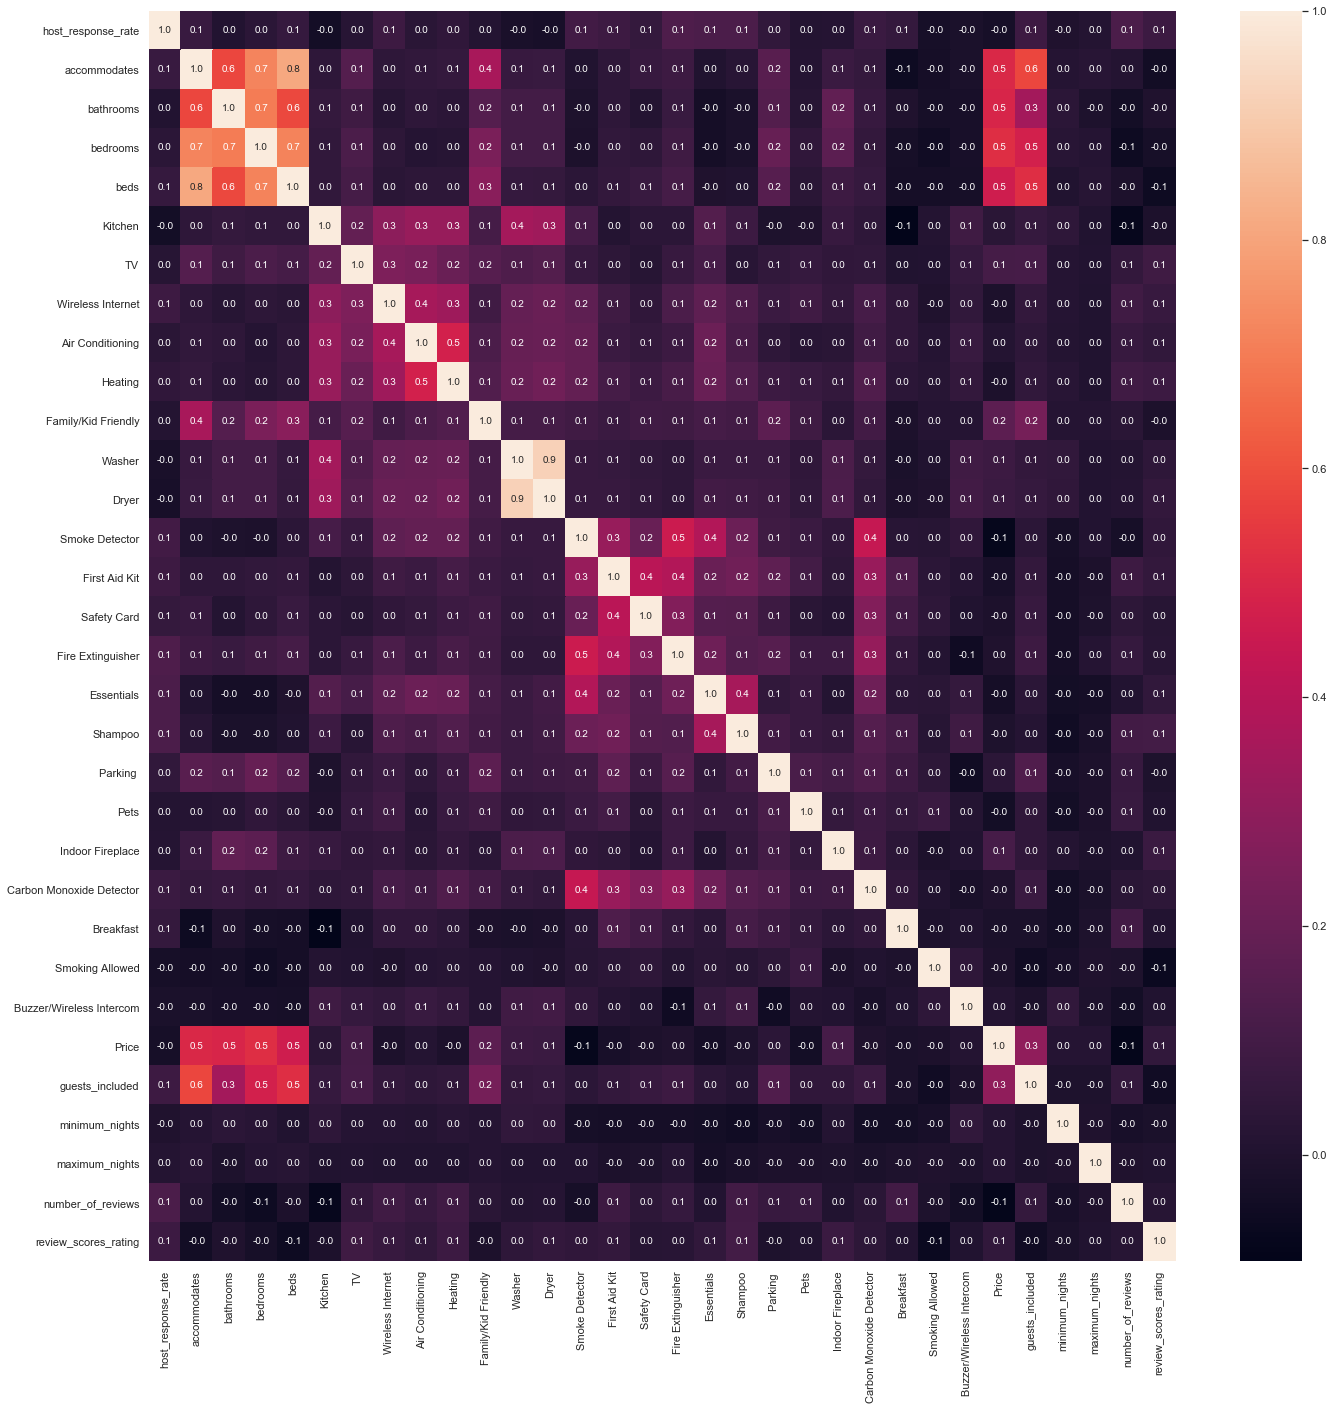

In [6]:
#we have plot a heat map to understand how each feature correlates to the other (Do they go hand in hand or are they inversely propotional)
f= plt.subplots(figsize=(23,23))
sns.heatmap(df.corr(),annot=True,fmt='.1f',color='green')  #We can use a simple seaborn method to draw the heatmaps

Now, we will check how price varies with the variables that show the highest correlation with it.

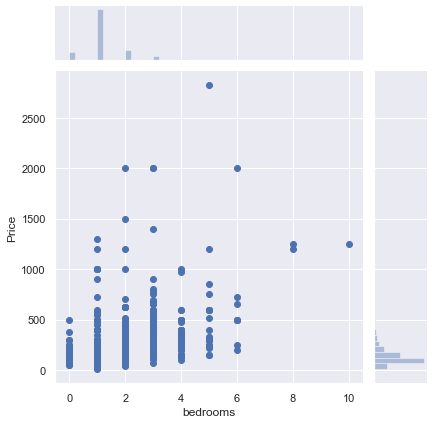

In [7]:
sns.jointplot('bedrooms','Price',data = df) #Price vs Bedrooms

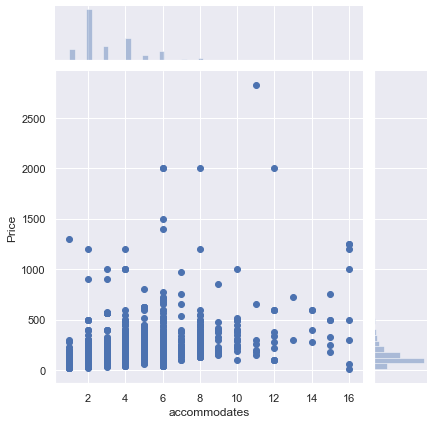

In [8]:
sns.jointplot('accommodates','Price',data = df) #Price vs Accommodates

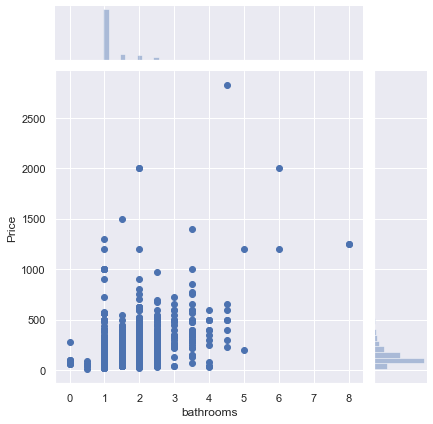

In [9]:
sns.jointplot('bathrooms','Price',data = df) #Price vs Bathrooms

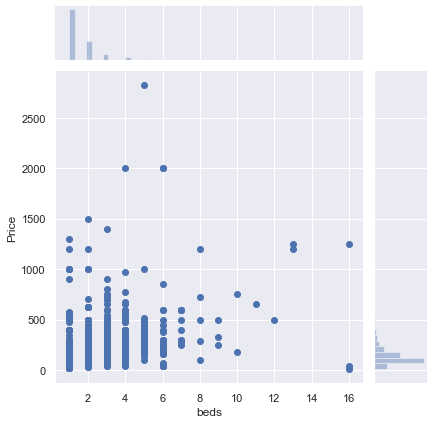

In [10]:
sns.jointplot('beds','Price',data = df) #Price vs Beds

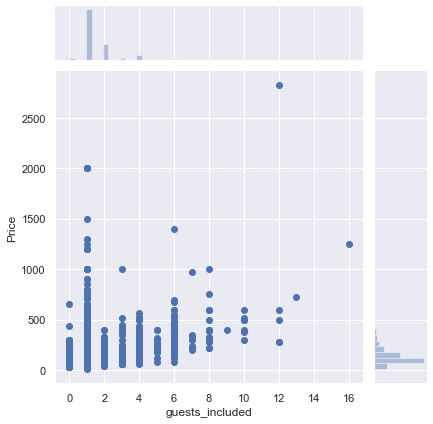

In [11]:
sns.jointplot('guests_included','Price',data = df) #Price vs Guests Included

# Categorical Variables

We need to first understand the distribution and behaviour of the categorical variables in the dataset to decide how to transform them. For that, we will use the group by function to analyse the records based on host response time, city, property type, room type, bed type & cancellation policy. Based on the distribution of records in various categories, we will decide how to transform these variables.

In [12]:
df.groupby('host_response_time').size() #Check distribution of host response time

host_response_time
a few days or more      63
within a day           791
within a few hours    1159
within an hour        1276
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Host Response Time')

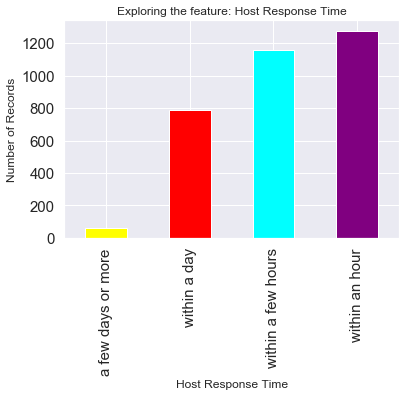

In [13]:
df.groupby(["host_response_time"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'cyan','purple'])
plt.xlabel('Host Response Time')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Host Response Time')

In [14]:
df.groupby('city').size() #Check distribution of cities

city
Adams Morgan                          1
Annapolis                             1
Arlington                             1
Capitol Heights                       1
Capitol Hill, Washington              1
Columbia Heights, middle of DC!       1
Dupont Circle                         1
Hyattsville                           2
Mount Rainier                         5
New York                              1
Silver Spring                         8
Takoma Park                           6
Washington                         3628
Washington                            2
Washington, D.C.                     63
chevy chase                           1
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: City')

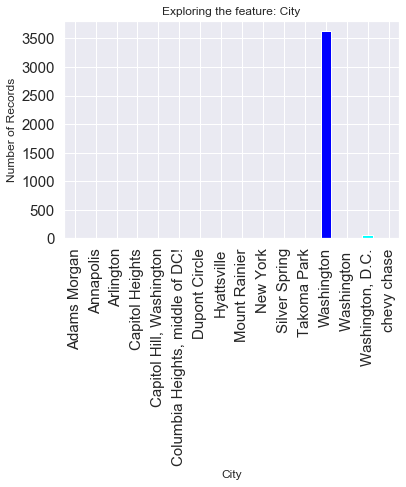

In [15]:
df.groupby(["city"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'green', 'blue','coral', 'cyan','purple','pink','black'])
plt.xlabel('City')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: City')

In [16]:
df.groupby('property_type').size() #Check distribution of property type

property_type
Apartment          2259
Bed & Breakfast      55
Boat                  2
Bungalow              1
Cabin                 1
Condominium          86
Dorm                  2
House              1210
Loft                 24
Other                12
Townhouse            70
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Property Type')

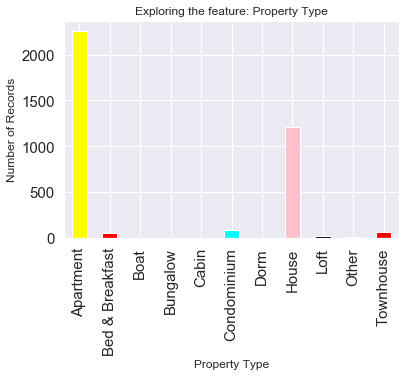

In [17]:
df.groupby(["property_type"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'green', 'blue','coral', 'cyan','purple','pink','black'])
plt.xlabel('Property Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Property Type')

In [18]:
df.groupby('room_type').size() #Check distribution of room type

room_type
Entire home/apt    2419
Private room       1202
Shared room         102
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Room Type')

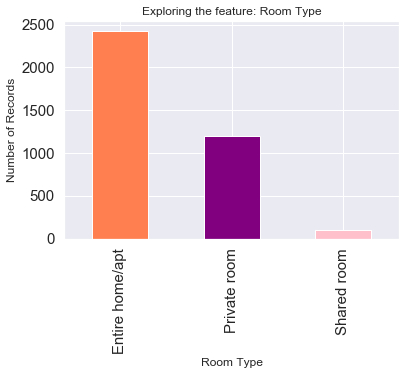

In [19]:
df.groupby(["room_type"]).size().plot(kind="bar",fontsize=15,color=['coral','purple','pink'])
plt.xlabel('Room Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Room Type')

In [20]:
df.groupby('bed_type').size() #Check distribution of bed type

bed_type
Airbed             37
Couch              13
Futon              55
Pull-out Sofa      48
Real Bed         3570
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Bed Type')

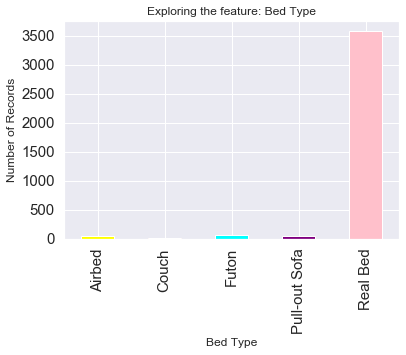

In [21]:
df.groupby(["bed_type"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'cyan','purple','pink'])
plt.xlabel('Bed Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Bed Type')

In [22]:
df.groupby('cancellation_policy').size() #Check distribution of cancellation policy

cancellation_policy
flexible           1373
moderate           1099
strict             1189
super_strict_30      62
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Cancellation Policy')

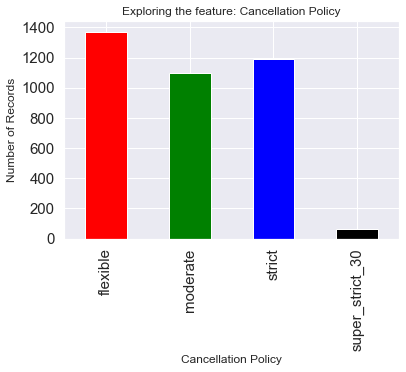

In [23]:
df.groupby(["cancellation_policy"]).size().plot(kind="bar",fontsize=15,color=['red', 'green', 'blue', 'black'])
plt.xlabel('Cancellation Policy')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Cancellation Policy')

Based on our analysis using the group by function. We decide on the following points:
- Based on the distribution of records, we will transform the host response time variable to have the following 3 categories: within an hour, within a few hours, within a day or more.
- For property type, we see some irregularities and to deal with that we will transform the data to include only the following 3 categories of property type: Apartment, House & Other.
- Most of the listings are from Washington and we see some listings from other cities and so, we decide to transform the data in way that we have only 2 categories of city: Washington D.C. & Other.
- For room type, the data seems fairly distributed and we will let these categories be as they are.
- For cancellation policy, the data seems fairly distributed and we will let these categories be as they are.
- For bed type, we see most of the listings are for real bed and and so, we decide to transform the data in way that we have only 2 categories of bed type: Real Bed & Other.

# Data Transformation

We will first transform our categorical variables based on the categories we defined in the previous step.
Next, we will convert all of them to binary variables using one hot vector. 
And then, we will be converting our boolean variables (All the amenities columns) to binary variables.

In [24]:
#Map all the host response time to within an hour, within a few hours, within a day or more.
df['host_response_time'] = df['host_response_time'].map({'a few days or more':'within a day or more', 'within a day':'within a day or more', 'within a few hours':'within a few hours', 'within an hour':'within an hour'})

#Verify the categories in host reponse time
df.groupby('host_response_time').size() 

host_response_time
within a day or more     854
within a few hours      1159
within an hour          1276
dtype: int64

In [25]:
#Map all the property types to Apartment, House & Other.
df['property_type'] = df['property_type'].map({'Boat':'Other', 'Bungalow':'Other', 'Cabin':'Other', 'Dorm':'Other', 'Loft':'Other', 'Apartment':'Apartment','Bed & Breakfast':'Other','Condominium':'Other','House':'House','Townhouse':'Other','Other':'Other'})

#Verify the categories in property type
df.groupby('property_type').size() 

property_type
Apartment    2259
House        1210
Other         253
dtype: int64

In [26]:
#Map all the cities to either Washington, D.C. or Other
df['city'] = df['city'].map({'Adams Morgan':'Washington, D.C.', 'Annapolis':'Other', 'Arlington':'Other', 'Capitol Heights':'Other','Capitol Hill, Washington':'Washington, D.C.', 
                             'Columbia Heights, middle of DC!':'Washington, D.C.', 'Dupont Circle ':'Washington, D.C.', 'Hyattsville':'Other', 'Mount Rainier':'Other', 'New York':'Other', 
                             'Silver Spring':'Other', 'Takoma Park':'Other', 'Washington':'Washington, D.C.', 'Washington':'Washington, D.C.', 'chevy chase':'Other'})

#Verify the categories in city
df.groupby('city').size() 

city
Other                 26
Washington, D.C.    3631
dtype: int64

In [27]:
#Map all the bed types to either Real Bed & Other
df['bed_type'] = df['bed_type'].map({'Airbed':'Other', 'Couch':'Other', 'Futon':'Other', 'Pull-out Sofa':'Other', 'Real Bed':'Real Bed'})

#Verify the categories in bed type
df.groupby('bed_type').size() 

bed_type
Other        153
Real Bed    3570
dtype: int64

In [28]:
#Converting response time to one hot vector
col1 = pd.get_dummies(df.host_response_time, prefix='Reponse_time')
del df['host_response_time']
df= pd.concat([df, col1], axis=1)

#Converting city to one hot vector
col2 = pd.get_dummies(df.city, prefix='City')
del df['city']
df= pd.concat([df, col2], axis=1)

#Converting property_type to one hot vector
col3 = pd.get_dummies(df.property_type, prefix='Property')
del df['property_type']
df= pd.concat([df, col3], axis=1)

#Converting room_type to one hot vector
col4 = pd.get_dummies(df.room_type, prefix='room')
del df['room_type']
df= pd.concat([df, col4], axis=1)

#Converting bed_type to one hot vector
col5 = pd.get_dummies(df.bed_type, prefix='bed')
del df['bed_type']
df= pd.concat([df, col5], axis=1)

#Converting cancellation_policy to one hot vector
col6 = pd.get_dummies(df.cancellation_policy, prefix='cancellation')
del df['cancellation_policy']
df= pd.concat([df, col6], axis=1)

#Convert all amenities to 0 & 1
df['Kitchen'] = df['Kitchen'].map({False:0, True:1})
df['TV'] = df['TV'].map({False:0, True:1})
df['Wireless Internet'] = df['Wireless Internet'].map({False:0, True:1})
df['Air Conditioning'] = df['Air Conditioning'].map({False:0, True:1})
df['Heating'] = df['Heating'].map({False:0, True:1})
df['Family/Kid Friendly'] = df['Family/Kid Friendly'].map({False:0, True:1})
df['Washer'] = df['Washer'].map({False:0, True:1})
df['Dryer'] = df['Dryer'].map({False:0, True:1})
df['Smoke Detector'] = df['Smoke Detector'].map({False:0, True:1})
df['First Aid Kit'] = df['First Aid Kit'].map({False:0, True:1})
df['Safety Card'] = df['Safety Card'].map({False:0, True:1})
df['Fire Extinguisher'] = df['Fire Extinguisher'].map({False:0, True:1})
df['Essentials'] = df['Essentials'].map({False:0, True:1})
df['Shampoo'] = df['Shampoo'].map({False:0, True:1})
df['Pets'] = df['Pets'].map({False:0, True:1})
df['Indoor Fireplace'] = df['Indoor Fireplace'].map({False:0, True:1})
df['Carbon Monoxide Detector'] = df['Carbon Monoxide Detector'].map({False:0, True:1})
df['Breakfast'] = df['Breakfast'].map({False:0, True:1})
df['Smoking Allowed'] = df['Smoking Allowed'].map({False:0, True:1})
df['Buzzer/Wireless Intercom'] = df['Buzzer/Wireless Intercom'].map({False:0, True:1})

df.head()

,host_response_rate,accommodates,bathrooms,bedrooms,beds,Kitchen,TV,Wireless Internet,Air Conditioning,Heating,...,Property_Other,room_Entire home/apt,room_Private room,room_Shared room,bed_Other,bed_Real Bed,cancellation_flexible,cancellation_moderate,cancellation_strict,cancellation_super_strict_30
0,0.92,4,1.0,1.0,2.0,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
1,0.90,6,3.0,3.0,3.0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
2,0.90,1,2.0,1.0,1.0,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
3,1.00,2,1.0,1.0,1.0,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
4,0.92,4,1.0,1.0,1.0,1,1,1,1,1,...,1,1,0,0,0,1,1,0,0,0


In [29]:
df.shape #Check the number of rows & columns in the dataset

(3723, 49)

# Interpreting the Data

We start by understanding the columns and data types of all columns before we finally start building our model.

In [30]:
df.info() #Check the datatype for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 49 columns):
host_response_rate                   3289 non-null float64
accommodates                         3723 non-null int64
bathrooms                            3696 non-null float64
bedrooms                             3702 non-null float64
beds                                 3712 non-null float64
Kitchen                              3723 non-null int64
TV                                   3723 non-null int64
Wireless Internet                    3723 non-null int64
Air Conditioning                     3723 non-null int64
Heating                              3723 non-null int64
Family/Kid Friendly                  3723 non-null int64
Washer                               3723 non-null int64
Dryer                                3723 non-null int64
Smoke Detector                       3723 non-null int64
First Aid Kit                        3723 non-null int64
Safety Card                   

In [31]:
df.columns #Checking the columns we are using in the model

Index(['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'Kitchen', 'TV', 'Wireless Internet', 'Air Conditioning', 'Heating',
       'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector',
       'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials',
       'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace',
       'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed',
       'Buzzer/Wireless Intercom', 'Price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'Reponse_time_within a day or more',
       'Reponse_time_within a few hours', 'Reponse_time_within an hour',
       'City_Other', 'City_Washington, D.C.', 'Property_Apartment',
       'Property_House', 'Property_Other', 'room_Entire home/apt',
       'room_Private room', 'room_Shared room', 'bed_Other', 'bed_Real Bed',
       'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict',
       'cancellation

# Data Imputation

Now, we check for null values in our dataset and try to eliminate them. We replace all the missing values with the mean for each column.

In [32]:
#Resetting the index to eliminate any infinite values
df = df.reset_index()

#Defining our dependent and independent variables 
X = df[['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds','Kitchen', 'TV', 'Wireless Internet', 
        'Air Conditioning', 'Heating','Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'First Aid Kit', 
        'Safety Card', 'Fire Extinguisher', 'Essentials', 'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace', 
        'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed', 'Buzzer/Wireless Intercom', 'guests_included',
        'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'Reponse_time_within a day or more',
        'Reponse_time_within a few hours', 'Reponse_time_within an hour', 'City_Other', 'City_Washington, D.C.', 'Property_Apartment',
        'Property_House', 'Property_Other', 'room_Entire home/apt','room_Private room', 'room_Shared room', 'bed_Other', 
        'bed_Real Bed', 'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict', 'cancellation_super_strict_30']]
y = df['Price']

In [33]:
X.isna().sum()

host_response_rate                   434
accommodates                           0
bathrooms                             27
bedrooms                              21
beds                                  11
Kitchen                                0
TV                                     0
Wireless Internet                      0
Air Conditioning                       0
Heating                                0
Family/Kid Friendly                    0
Washer                                 0
Dryer                                  0
Smoke Detector                         0
First Aid Kit                          0
Safety Card                            0
Fire Extinguisher                      0
Essentials                             0
Shampoo                                0
Parking                                0
Pets                                   0
Indoor Fireplace                       0
Carbon Monoxide Detector               0
Breakfast                              0
Smoking Allowed 

In [34]:
X = X.fillna(X.mean()) 
X.isna().sum()

host_response_rate                   0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
Kitchen                              0
TV                                   0
Wireless Internet                    0
Air Conditioning                     0
Heating                              0
Family/Kid Friendly                  0
Washer                               0
Dryer                                0
Smoke Detector                       0
First Aid Kit                        0
Safety Card                          0
Fire Extinguisher                    0
Essentials                           0
Shampoo                              0
Parking                              0
Pets                                 0
Indoor Fireplace                     0
Carbon Monoxide Detector             0
Breakfast                            0
Smoking Allowed                      0
Buzzer/Wireless Intercom 

# Split the data

Now we will split the data into training and test sets. We will keep 75% of the data for training the model and 25% of the data to test the model that we build.

In [35]:
#Split the data to train and test sets
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

#Check the number of records in training and test partitions
print("X_train unscaled : " + str(X_train_org.shape))
print("X_test unscaled: " + str(X_test_org.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train unscaled : (2792, 48)
X_test unscaled: (931, 48)
y_train : (2792,)
y_test : (931,)


# Data Scaling

In [36]:
#Standardize the training and test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#Check the number of records in training and test partitions
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (2792, 48)
X_test : (931, 48)
y_train : (2792,)
y_test : (931,)


# Regression Models

# 1. KNN Regressor 

Text(0, 0.5, 'MSE')

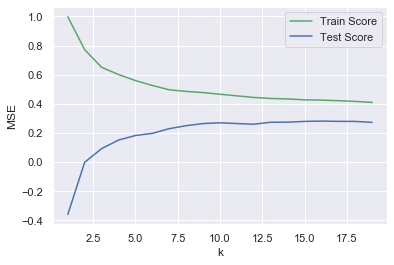

In [37]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [38]:
# we will now use grid search and cross-validation to get the best parameters
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':range(1,20),'weights': ['distance','uniform']}
model = GridSearchCV(knn_reg, params)
model.fit(X_train,y_train)
model.best_params_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 11, 'weights': 'distance'}

In [39]:
#Based on above graph we selected 11 as the best number of neighbours
knn_reg1 = KNeighborsRegressor(11)
knn_reg1.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn_reg1.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn_reg1.score(X_test, y_test)))

Train score: 0.4545
Test score: 0.2644


In [40]:
#Cross validation with the best knn model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
knr = KNeighborsRegressor(n_neighbors = 11, weights = 'distance')

knr.fit(X_train, y_train)

y_pred_knn=knr.predict(X_test)

# Cross Validation
cv_scores = cross_val_score(knr, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(knr, X_test, y_test,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))

Cross-validation training scores (5-fold): [0.43538322 0.15185272 0.2984567  0.45174426 0.29576006]
Cross-validation testing scores (5-fold): [0.52278729 0.41961376 0.27984785 0.38657741 0.04578901]
Mean cross-validation training score (5-fold): 0.3266
Mean cross-validation testing score (5-fold): 0.3309
RMSE: 100.4599


# 2. Linear Regression 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
lr = LinearRegression()

lr.fit(X_train, y_train)
pred_linear = lr.predict(X_test)

print('Train score: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lr.score(X_test,y_test)))


# Cross Validation with linear Regression
cv_scores = cross_val_score(lr, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(lr, X_test, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_linear))))

Train score: 0.4100
Test score: 0.3256
Cross-validation training scores (5-fold): [ 4.73013551e-01  2.52110300e-01  3.48761636e-01 -7.80596548e+19
  3.13491793e-01]
Cross-validation testing scores (5-fold): [0.4546051  0.48154013 0.29637325 0.44850538 0.14096627]
Mean cross-validation training score (5-fold): -15611930967016030208.0000
Mean cross-validation testing score (5-fold): 0.3644
RMSE: 96.5212


Text(0.5, 0, 'RM')

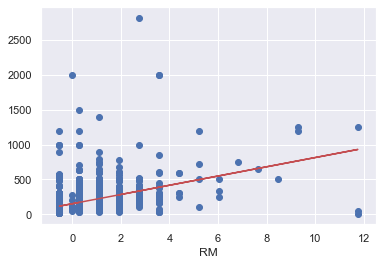

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,4].reshape(-1,1)
lr.fit(X_train_rm, y_train)
y_predict = lr.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# 3. SGD Regressor

In [43]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

param = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter':[10000],
    'tol': [0.0001]
}

cl = GridSearchCV(sgd, param, cv=3)
cl.fit(X_train, y_train)
print("Train score: " + str(cl.best_score_))
cl.fit(X_test, y_test)
print("Test score: " + str(cl.best_score_))
print(cl.best_params_)
SGD = cl.best_params_
yPredSGD=cl.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/line

Train score: 0.3711411242162845


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/line

Test score: 0.3593480788695715
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'huber', 'max_iter': 10000, 'penalty': 'l1', 'tol': 0.0001}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
#SGD Cross validation with grid search results
sgd = SGDRegressor(alpha= 0.0001, learning_rate= 'optimal', loss= 'epsilon_insensitive', max_iter= 10000, penalty= 'l1', tol= 0.0001)

sgd.fit(X_train, y_train)

pred_sgd = sgd.predict(X_test)

print('Train score: {}'.format(sgd.score(X_train, y_train)))
print('Test score: {}'.format(sgd.score(X_test,y_test)))

# Cross Validation
cv_scores = cross_val_score(sgd, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(sgd,X_test, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_sgd))))

Train score: 0.33829407690858526
Test score: 0.3227180952788492
Cross-validation training scores (5-fold): [0.45229977 0.26567134 0.28177032 0.37158904 0.2791058 ]
Cross-validation testing scores (5-fold): [0.56818663 0.49506873 0.33280007 0.4594066  0.12234084]
Mean cross-validation training score (5-fold): 0.3301
Mean cross-validation testing score (5-fold): 0.3956
RMSE: 96.7251


# 4. Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [46]:
print(train_score_list)
print(test_score_list)

[0.4100417954150676, 0.4100088847589811, 0.4073990155808015, 0.3597730208704425, 0.0]
[0.32569632151709993, 0.32677660954443893, 0.3323259642013541, 0.30664779000509745, -0.004557160064553756]


Text(0.5, 0, '$\\alpha$')

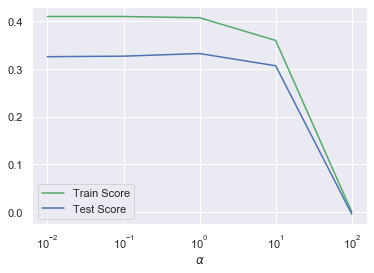

In [47]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332929.07143842056, tolerance: 6016.212811998567
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73479.28677825257, tolerance: 6016.212811998567
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25487.657367274165, tolerance: 6016.212811998567
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10603.2554

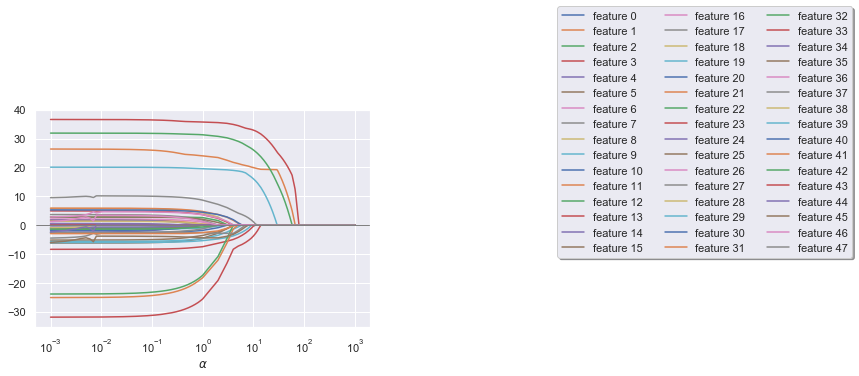

In [48]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,48):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(2, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [49]:
# Grid Search for Algorithm Tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
param_grid = {
    'alpha': [100,10,2,1,0.5,0.1,0.01,0.001],
    'max_iter': [10e5]
    
}
# create and fit a lasso regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train, y_train)
yPredictions3 =grid.predict(X_test)


# summarize the results of the grid search
print ("Train Score:",grid.score(X_train, y_train))
print ("Test Score :",grid.score(X_test, y_test))
print("Best_Value_For_Alpha:",grid.best_params_)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train Score: 0.4073990155808015
Test Score : 0.3323259642013541
Best_Value_For_Alpha: {'alpha': 1, 'max_iter': 1000000.0}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
lasso = Lasso(alpha = 1, max_iter = 1000000.0)

lasso.fit(X_train, y_train)
y_pred_lasso=lasso.predict(X_test)

# Cross Validation
cv_scores = cross_val_score(lasso, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(lasso, X_test, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))

Cross-validation training scores (5-fold): [0.48688859 0.25105451 0.35008786 0.48700642 0.31222282]
Cross-validation testing scores (5-fold): [0.49805208 0.5158583  0.33273794 0.48447098 0.13318351]
Mean cross-validation training score (5-fold): 0.3775
Mean cross-validation testing score (5-fold): 0.3929
RMSE: 96.0366


# 5. Ridge Regression

In [51]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [52]:
print(train_score_list)
print(test_score_list)

[0.410042891148895, 0.410042889047333, 0.4100427307382849, 0.41003157985935923, 0.4092384970746473]
[0.3255639486665588, 0.3255716441349611, 0.3256467684186465, 0.3263486741019843, 0.33149968318989015]


Text(0.5, 0, '$\\alpha$')

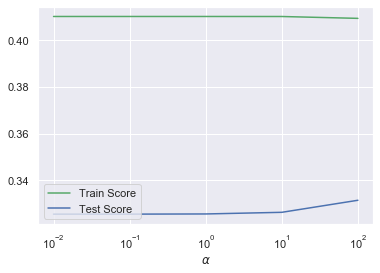

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [54]:
# Using GridSearchCV to find the best alpha

ridge = Ridge()
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

#use gridsearch to get the best parameters, alpha=0.001
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.4f}'.format(grid_search.best_score_))
Ridgebest = grid_search.best_params_

Best parameters{'alpha': 100}
Best score 0.3748


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
ridge = Ridge(alpha = 100)

ridge.fit(X_train, y_train)

y_pred_ridge=ridge.predict(X_test)

# Cross Validation
cv_scores = cross_val_score(ridge, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(ridge, X_test, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))

Cross-validation training scores (5-fold): [0.48146873 0.2475226  0.34738964 0.48471891 0.31281779]
Cross-validation testing scores (5-fold): [0.50946166 0.51517982 0.34470454 0.4793781  0.13601443]
Mean cross-validation training score (5-fold): 0.3748
Mean cross-validation testing score (5-fold): 0.3969
RMSE: 96.0960


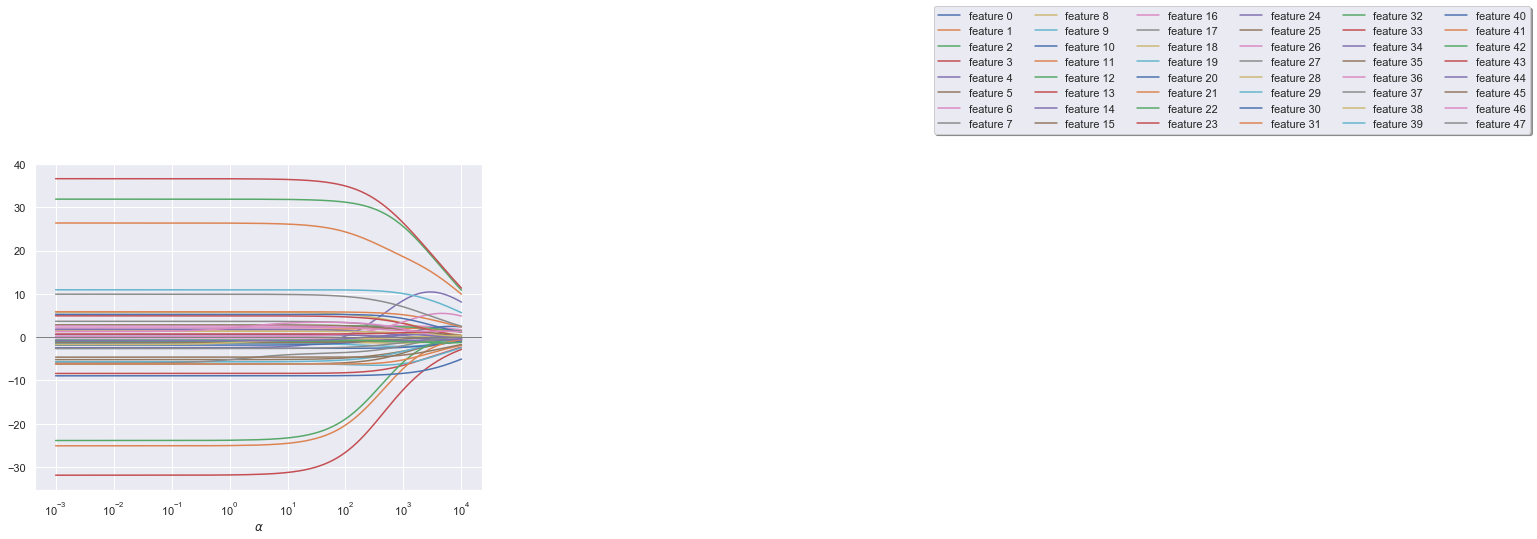

In [56]:
#Feature Selection

sns.set(rc={'figure.figsize':(8,6)})
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,48):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.rcParams["figure.figsize"] = (6,4)
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(2, 1.5),
          ncol=6, fancybox=True, shadow=True)
plt.show()

# 6. Linear SVR

In [57]:
# SVR without kernel
from sklearn.svm import LinearSVR
lsvr = LinearSVR()
lsvr.fit(X_train, y_train)
y_pred_lsvr=lsvr.predict(X_test)
print('Train score: {}'.format(lsvr.score(X_train, y_train)))
print('Test score: {}'.format(lsvr.score(X_test,y_test)))

Train score: 0.31947298430940696
Test score: 0.3174203071965854


In [58]:
# Grid search for Linear SVR
from sklearn.model_selection import GridSearchCV
param_linear = [
  {'C': [0.001,0.01,1, 10]}]
lsvr = LinearSVR()
lsvr_grid = GridSearchCV(estimator=lsvr, param_grid=param_linear, n_jobs=-1,cv=3)
lsvr_grid.fit(X_train[:50], y_train[:50])
y_pred_lsvr=lsvr_grid.predict(X_test[:50])
# View the accuracy score
print('Best score for data1:', lsvr_grid.best_score_)
# View the best parameters for the model found using grid search
print('Best C:',lsvr_grid.best_estimator_.C)

Best score for data1: -0.3690407215820206
Best C: 10


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
#Run model with best parameters
lsvr = LinearSVR(C=10)
lsvr.fit(X_train, y_train)
y_pred_lsvr=lsvr.predict(X_test)
print('Train score: {}'.format(lsvr.score(X_train, y_train)))
print('Test score: {}'.format(lsvr.score(X_test,y_test)))

Train score: 0.33200452437187045
Test score: 0.3271367120567256


In [60]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
cv_scores = cross_val_score(lsvr, X_train, y_train,cv = 3)
cv_test_scores = cross_val_score(lsvr, X_test, y_test,cv = 3)
print('Cross-validation training scores (3-fold):', cv_scores)
print('Cross-validation testing scores (3-fold):', cv_test_scores)
print('Mean cross-validation training score (3-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (3-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}\n'.format(np.sqrt(mean_squared_error(y_test,y_pred_lsvr))))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross-validation training scores (3-fold): [0.46745456 0.26130067 0.34973824]
Cross-validation testing scores (3-fold): [0.52632068 0.34691925 0.19309788]
Mean cross-validation training score (3-fold): 0.3595
Mean cross-validation testing score (3-fold): 0.3554
RMSE: 96.4091



//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# 7. SVM Regressor with Kernel- Linear

In [61]:
from sklearn import svm
from sklearn.svm import SVR

param_linear = [
  {'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]

clf_linear = GridSearchCV(estimator=svm.SVR(kernel='linear'), param_grid=param_linear, n_jobs=-1,cv=3)
clf_linear.fit(X[:10], y[:10])   

# View the accuracy score
print('Best score for data1:', clf_linear.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_linear.best_estimator_.C) 
#print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf_linear.best_estimator_.gamma)
print('Best Epsilon:',clf_linear.best_estimator_.epsilon)
Lsvmbest = [clf_linear.best_estimator_]

Best score for data1: -18.4337450565423
Best C: 0.001
Best Gamma: 0.001
Best Epsilon: 0.5


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
svrl = SVR(kernel = 'linear', gamma =0.001,C=0.001,epsilon = 0.5 )

svrl.fit(X_train, y_train)

y_pred_svrl=svrl.predict(X_test)

print('Train score: {}'.format(svrl.score(X_train, y_train)))
print('Test score: {}'.format(svrl.score(X_test,y_test)))
print('RMSE: {:.4f}\n'.format(np.sqrt(mean_squared_error(y_test,y_pred_svrl))))

#Cross Validation
cv_scores = cross_val_score(svrl, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(svrl, X_test, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Train score: -0.016505269961532676
Test score: -0.00716267299919604
RMSE: 117.9518

Cross-validation training scores (5-fold): [-0.00186191 -0.03020041 -0.03170338 -0.04071688 -0.02154751]
Cross-validation testing scores (5-fold): [-0.03004308 -0.13434115 -0.07516716 -0.04748469 -0.03522177]
Mean cross-validation training score (5-fold): -0.0252
Mean cross-validation testing score (5-fold): -0.0645


# 8. SVM Regressor with Kernel- Poly

In [63]:
from sklearn import svm

param_poly = [
  {'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]

clf_poly = GridSearchCV(estimator=svm.SVR(kernel='poly'), param_grid=param_poly, n_jobs=-1,cv=3)
clf_poly.fit(X[:10], y[:10])   

# View the accuracy score
print('Best score for data1:', clf_poly.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_poly.best_estimator_.C) 
print('Best Gamma:',clf_poly.best_estimator_.gamma)
print('Best Epsilon:',clf_poly.best_estimator_.epsilon)
Psvmbest = [clf_poly.best_estimator_]

Best score for data1: -27.121076653215646
Best C: 0.001
Best Gamma: 0.001
Best Epsilon: 0.5


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [64]:
svr2= SVR(kernel = 'poly', gamma =0.001,C=0.001,epsilon = 0.5)

svr2.fit(X_train, y_train)

y_pred_svr2=svr2.predict(X_test)

print('Train score: {}'.format(svr2.score(X_train, y_train)))
print('Test score: {}'.format(svr2.score(X_test,y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svr2))))

#Cross Validation
cv_scores = cross_val_score(svr2, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(svr2, X_test, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Train score: -0.05898089494203451
Test score: -0.05560939789898045
RMSE: 120.7553
Cross-validation training scores (5-fold): [-0.04353773 -0.0610391  -0.05899149 -0.0781789  -0.05579445]
Cross-validation testing scores (5-fold): [-0.05194678 -0.16417956 -0.09479906 -0.0665085  -0.0388249 ]
Mean cross-validation training score (5-fold): -0.0595
Mean cross-validation testing score (5-fold): -0.0833


# 9. SVM Regressor with Kernel- Rbf

In [65]:
from sklearn import svm

param_rbf = [
  {'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]

clf_rbf = GridSearchCV(estimator=svm.SVR(kernel='rbf'), param_grid=param_rbf, n_jobs=-1,cv=3)
clf_rbf.fit(X[:10], y[:10])   

# View the accuracy score
print('Best score for data1:', clf_rbf.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_rbf.best_estimator_.C) 
#print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf_rbf.best_estimator_.gamma)
print('Best Epsilon:',clf_rbf.best_estimator_.epsilon)
Rbfsvmbest = [clf_rbf.best_estimator_]

Best score for data1: -0.568356750879629
Best C: 10
Best Gamma: 0.1
Best Epsilon: 0.5


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
svr3= SVR(kernel = 'rbf', gamma =0.1,C=10,epsilon = 0.5)

svr3.fit(X_train, y_train)

y_pred_svr3=svr3.predict(X_test)

print('Train score: {}'.format(svr3.score(X_train, y_train)))
print('Test score: {}'.format(svr3.score(X_test,y_test)))

#Cross Validation
cv_scores = cross_val_score(svr3, X_train, y_train,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(svr3, X_test, y_test,cv = 5)
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('RMSE: {:.4f}\n'.format(np.sqrt(mean_squared_error(y_test,y_pred_svr3))))

Train score: 0.08109993462044429
Test score: 0.06183548608050804
Mean cross-validation training score (5-fold): 0.0270
Mean cross-validation testing score (5-fold): -0.0235
Cross-validation training scores (5-fold): [ 0.07167128  0.01050711 -0.00420097  0.00711825  0.05004027]
Cross-validation testing scores (5-fold): [ 0.02758863 -0.08515915 -0.04232973  0.01132025 -0.02912911]
RMSE: 113.8398



# 10. Polynomial Regression

In [67]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3)}

linreg = GridSearchCV(PolynomialRegression(), param_grid, cv=3, scoring='neg_mean_squared_error')

linreg.fit(X_train, y_train)
linregbest = linreg.best_params_
print(linreg.best_params_)

{'polynomialfeatures__degree': 0}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(degree=1)

X_poly = poly.fit_transform(X)
X_train_py, X_test_py, y_train, y_test = train_test_split(X_poly, y, test_size = 0.25, random_state = 0)
linreg = LinearRegression()

linreg.fit(X_train_py, y_train)

y_pred_poly=linreg.predict(X_test_py)

print('Train score: {}'.format(linreg.score(X_train_py, y_train)))
print('Test score: {}'.format(linreg.score(X_test_py,y_test)))
print('RMSE: {:.4f}\n'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))

Train score: 0.4100428911710913
Test score: 0.3255630907542211
RMSE: 96.5218



In [69]:
# Cross Validation

cv_scores = cross_val_score(linreg, X_train_py, y_train,cv = 5)
cv_test_scores = cross_val_score(linreg, X_test_py, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [  0.46909546   0.24805402   0.34824885 -40.38596115   0.3148886 ]
Cross-validation testing scores (5-fold): [0.45615743 0.48178693 0.29619559 0.44828071 0.14097112]
Mean cross-validation training score (5-fold): -7.8011
Mean cross-validation testing score (5-fold): 0.3647


# Best Model

We can see based on the train & test score, Mean CV scores and RMSE that Lasso Regression gives us the best accuracy and therefore this will be our preferred model.

# Classification

Dataset description: We picked this dataset from Kaggle UCI Machine Learning. This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

This Dataset contains 32561 rows and 15 features, among which income is our target variable.
Link for Dataset reference: https://www.kaggle.com/uciml/adult-census-income#adult.csv

Feature Description:

1. age              :  Age of the person
2. workclass        :  Workclass category person belongs to
3. fnlwgt           :  Value assigned on basis of similarity of demographic
4. education        :  Highest level of education completed by the person
5. education.num    :  Class number for the highest level of education
6. marital.status   :  Marital status of the person 
7. occupation       :  Occupation of the person
8. relationship     :  Relationship of the person
9. race             :  Race that person belongs to
10. sex             :  Sex of the person
11. capital.gain    :  Capital gain associated with that particular record
12. capital.loss    :  Capital loss associated with that particular record
13. hours.per.week  :  Weekly hours person works
14. native.country  :  Native country of the person
15. income          :  Income class of the person (>50K or <=50K)



# Loading Dataset

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [71]:
df = pd.read_csv(os.path.expanduser("~/Downloads/adult.csv"))
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [72]:
# Checking total no. of rows and columns in dataframe and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [73]:
#Statistical Summary of all the Numeric features:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [74]:
# Statistical summary of all the features in dataframe
df.describe(include="all")

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [75]:
# Check for any null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [76]:
# All the features in our dataframe shows 0 null values because '?' 
# has been substitued in our initial csv instead of null/nan
# so we will replace ? with nan
df = df.replace('?', np.nan)
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [77]:
#Since nulls are present only in features - workclass, occupation and native.country 
#We replace the nulls with 'Unknown-Category' for Exploratory Data Analysis
df = df.replace(np.nan,'Unknown-Category')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown-Category,77053,HS-grad,9,Widowed,Unknown-Category,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown-Category,186061,Some-college,10,Widowed,Unknown-Category,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Exploratory Data Analysis


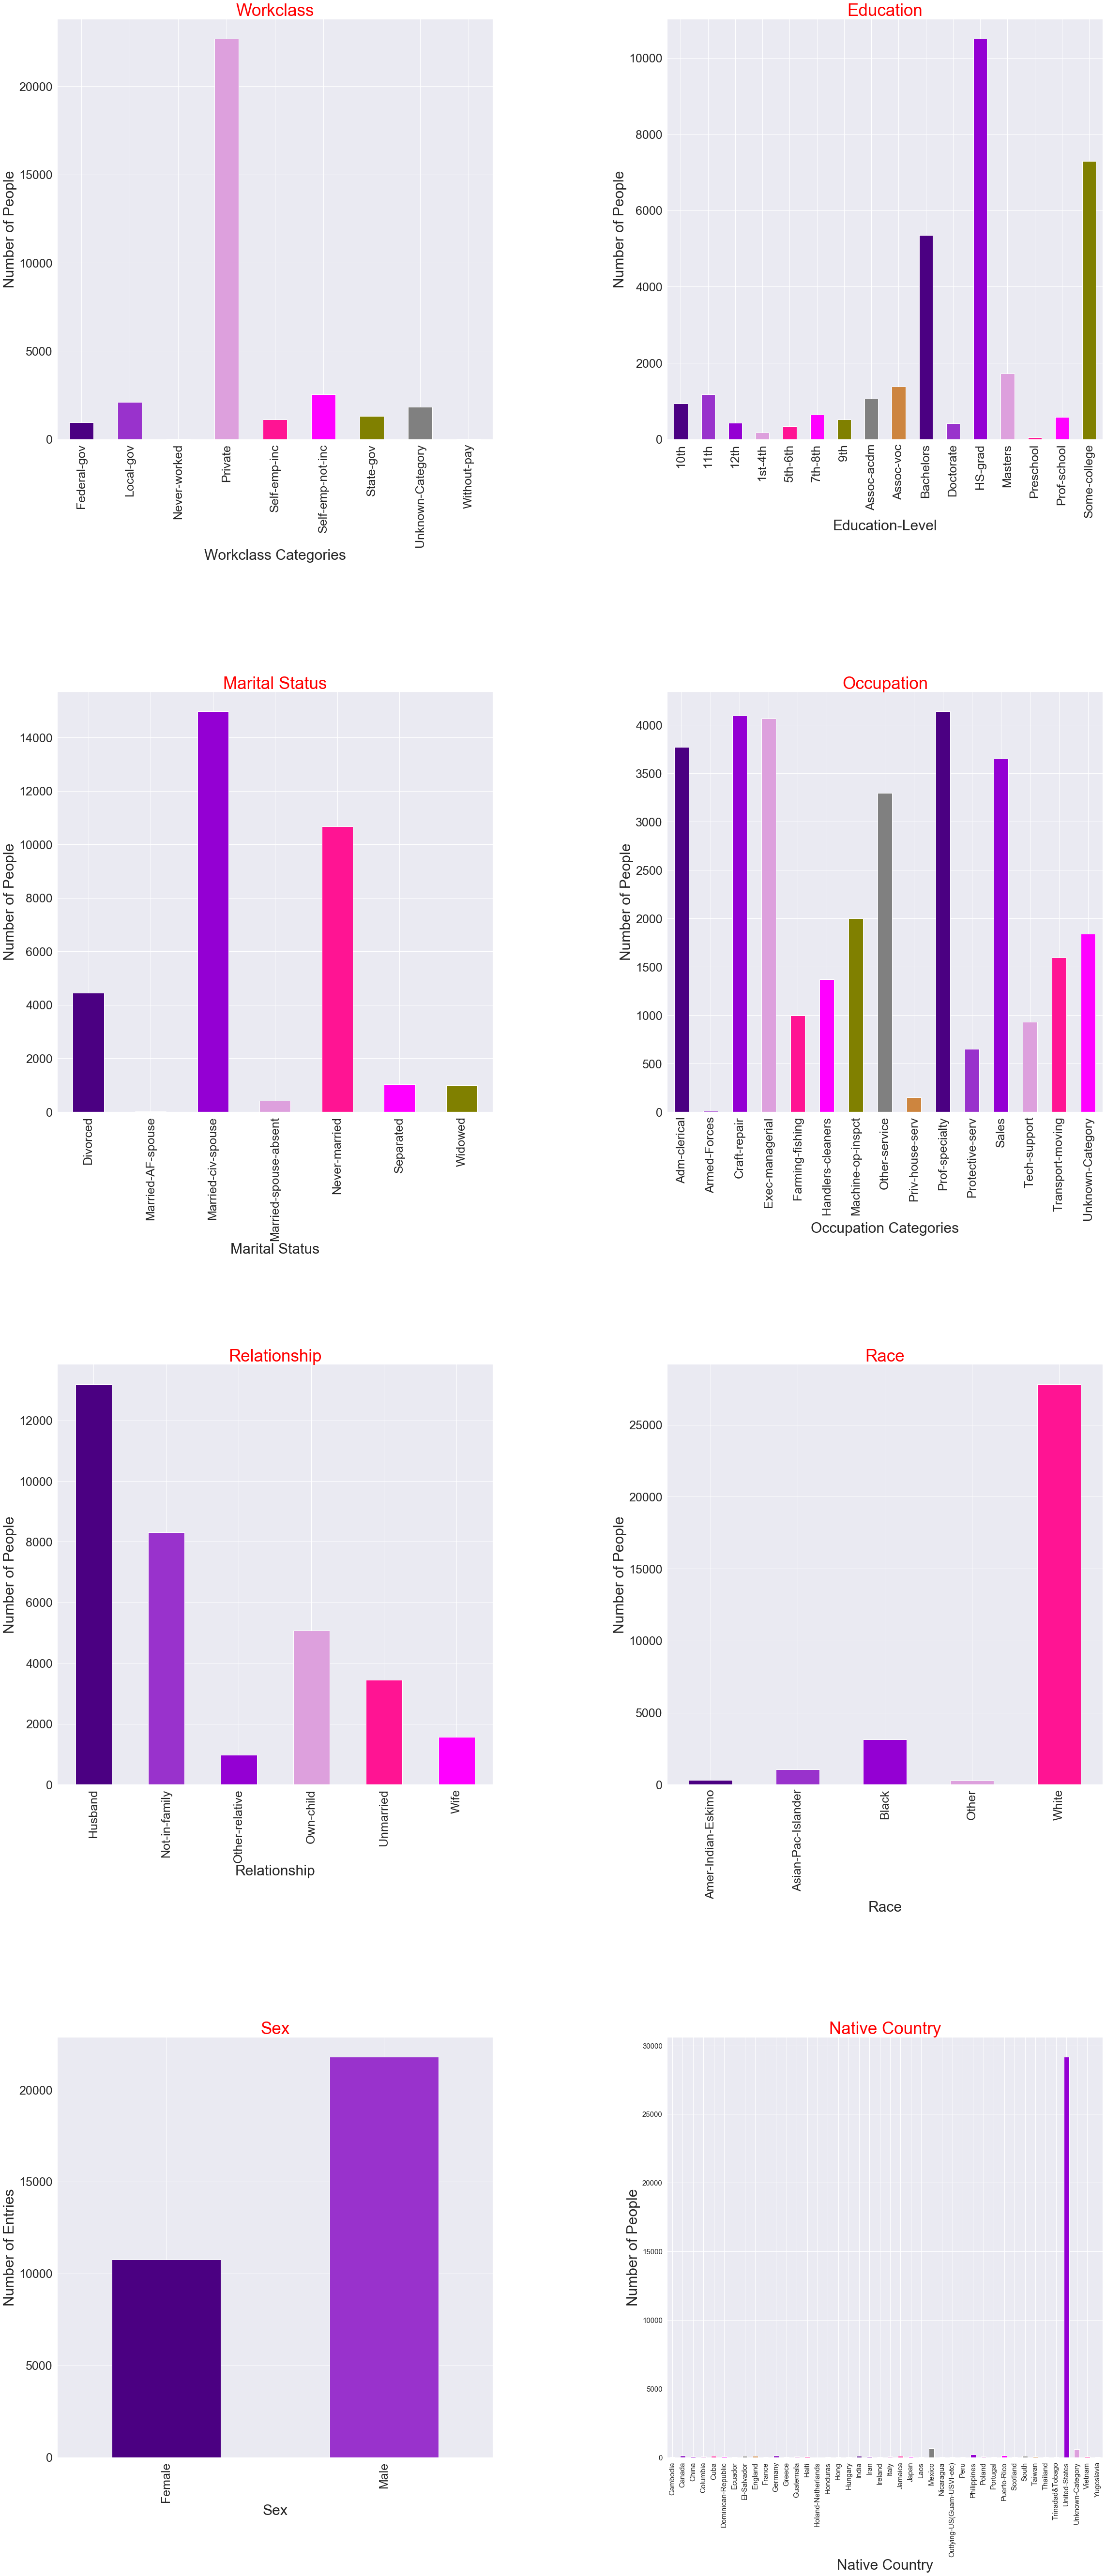

In [78]:
#Exploring trends in Categorical Features:
plt.figure(figsize= (100,100))
plt.subplots_adjust(top=1, bottom=0.30, left=0.10, right=0.40, hspace=0.60, wspace=0.40)

plt.subplot(421)
df.groupby(["workclass"]).size().plot(kind="bar",fontsize=25, color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Workclass Categories',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Workclass',fontsize=35,color='red')
plt.grid(True)

plt.subplot(422)
df.groupby(["education"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Education-Level',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Education',fontsize=35,color='red')
plt.grid(True)

plt.subplot(423)
df.groupby(["marital.status"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Marital Status',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Marital Status',fontsize=35,color='red')
plt.grid(True)

plt.subplot(424)
df.groupby(["occupation"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Occupation Categories',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Occupation',fontsize=35,color='red')
plt.grid(True)

plt.subplot(425)
df.groupby(["relationship"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Relationship',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Relationship',fontsize=35,color='red')
plt.grid(True)

plt.subplot(426)
df.groupby(["race"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Race',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Race',fontsize=35,color='red')
plt.grid(True)

plt.subplot(427)
df.groupby(["sex"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Sex',fontsize=30)
plt.ylabel('Number of Entries',fontsize=30)
plt.title('Sex',fontsize=35,color='red')
plt.grid(True)

plt.subplot(428)
df.groupby(["native.country"]).size().plot(kind="bar",fontsize=15,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Native Country',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Native Country',fontsize=35,color='red')
plt.grid(True)

plt.show()


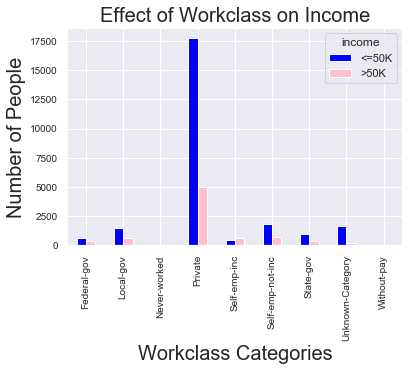

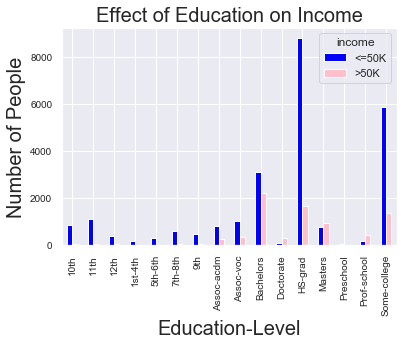

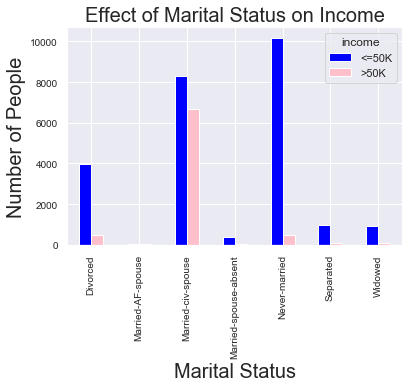

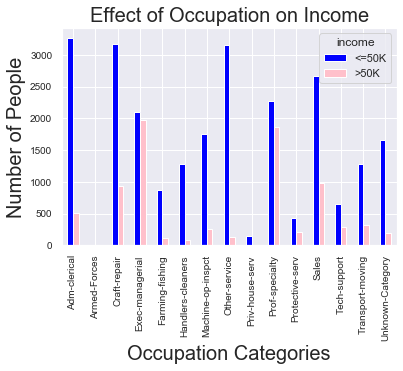

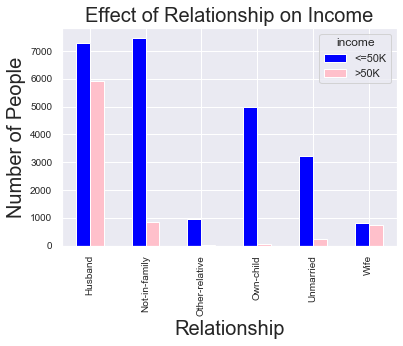

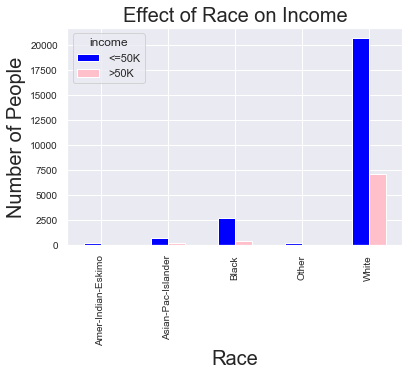

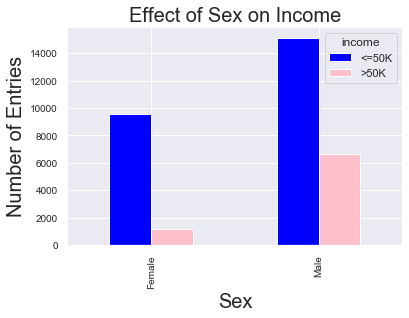

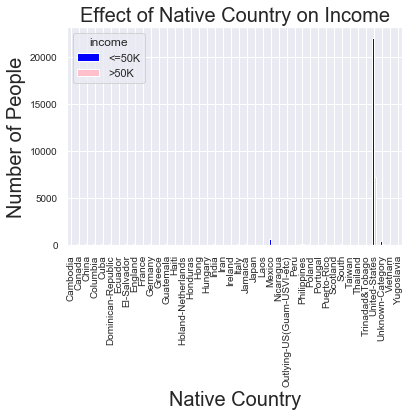

In [79]:
# Effect of Categorical features on target variable-Income

df.groupby(["income","workclass"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Workclass Categories',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Workclass on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","education"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Education-Level',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Education on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","marital.status"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Marital Status',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Marital Status on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","occupation"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Occupation Categories',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Occupation on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","relationship"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Relationship',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Relationship on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","race"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Race',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Race on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","sex"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Sex',fontsize=20)
plt.ylabel('Number of Entries',fontsize=20)
plt.title('Effect of Sex on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","native.country"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Native Country',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Native Country on Income',fontsize=20)
plt.grid(True)





# Target Variable- Income

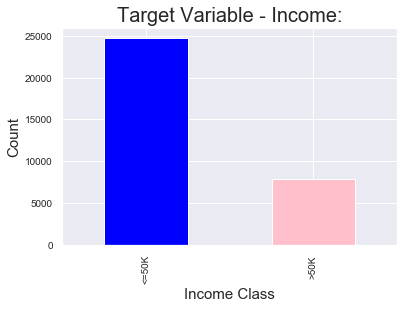

In [80]:
df.groupby(["income"]).size().plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Income Class',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Target Variable - Income:',fontsize=20)
plt.grid(True)

In [81]:
# Total number of records belonging to both income categories

Total_records = len(df)

#Number of records where individual's income is more than $50,000
greater_than_50k = len(df.query('income == ">50K"'))

#Number of records where individual's income is at most $50,000
less_than_equal_50k = len(df.query('income == "<=50K"'))

#Percentage of individuals's income exceeds $50,000
greater_50k_percent = (float(greater_than_50k) / Total_records * 100)

print("Total number of records: {}".format(Total_records))
print("Number of people whose income exceeds $50,000: {}".format(greater_than_50k))
print("Number of people whose income is at most $50,000: {}".format(less_than_equal_50k))
print("Percentage of people whose income exceeds $50,000: {:.4f}%".format(greater_50k_percent))

Total number of records: 32561
Number of people whose income exceeds $50,000: 7841
Number of people whose income is at most $50,000: 24720
Percentage of people whose income exceeds $50,000: 24.0810%


76 % of total people belongs to the category having income less than 50 k

# Analysis of Nominal features 

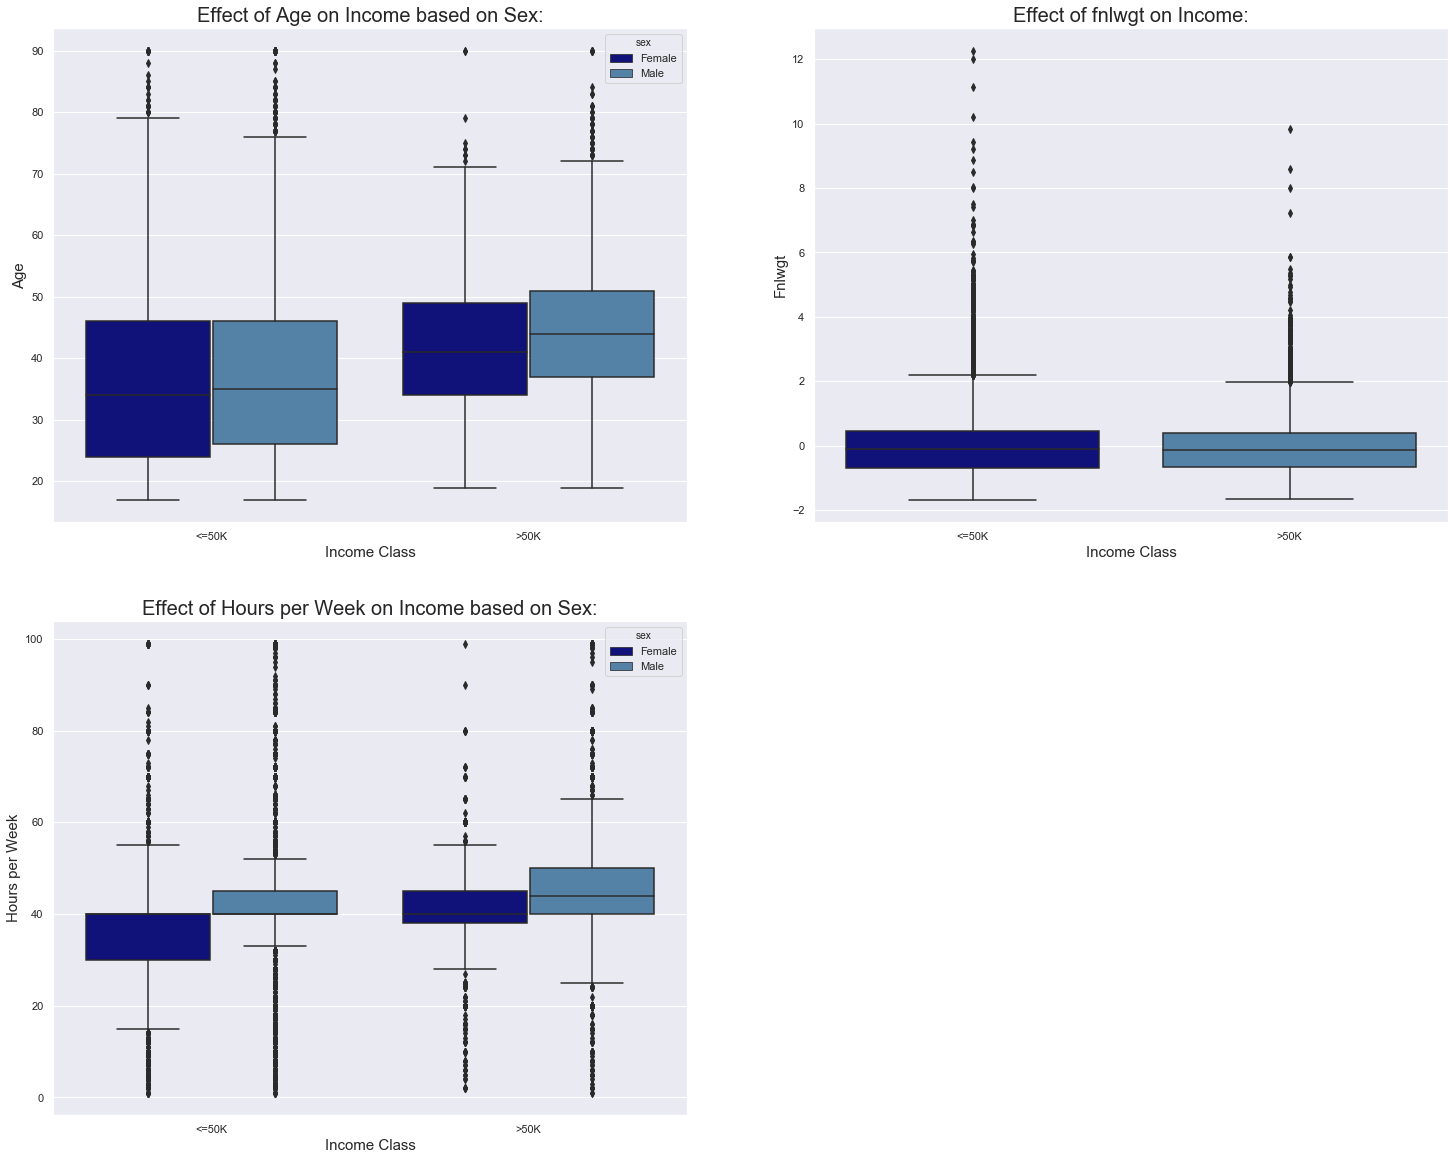

In [82]:
plt.figure(figsize=(25,20))
my_pal = {"Female": "darkblue", "Male":"steelblue"}
my_pal1 = {"<=50K": "darkblue", ">50K":"steelblue"}

plt.subplot(221)
sns.boxplot(x="income", y="age", data=df, hue='sex',palette=my_pal)
plt.xlabel('Income Class',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.title('Effect of Age on Income based on Sex:',fontsize=20)

plt.subplot(222)
fnl = (df["fnlwgt"] - df['fnlwgt'].mean())/df['fnlwgt'].std()
sns.boxplot(x="income", y=fnl, data=df,palette=my_pal1)
plt.xlabel('Income Class',fontsize=15)
plt.ylabel('Fnlwgt',fontsize=15)
plt.title('Effect of fnlwgt on Income:',fontsize=20)

plt.subplot(223)
sns.boxplot(x='income',y ='hours.per.week', hue='sex',data=df,palette=my_pal)
plt.xlabel('Income Class',fontsize=15)
plt.ylabel('Hours per Week',fontsize=15)
plt.title('Effect of Hours per Week on Income based on Sex:',fontsize=20)

plt.show()

Heatmap for showing correlation between nominal features

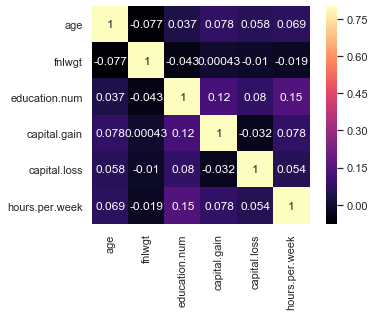

In [83]:
hmap = df.corr()
plt.plot(figsize=(25, 20))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="magma", square=True)

In [84]:
pivot = df.pivot_table(df, index=['income'], aggfunc=np.mean)
pivot

,age,capital.gain,capital.loss,education.num,fnlwgt,hours.per.week
income,,,,,,
<=50K,36.783738,148.752468,53.142921,9.595065,190340.86517,38.840210
>50K,44.249841,4006.142456,195.001530,11.611657,188005.00000,45.473026


# Data Cleaning

In [85]:
# we first start by replacing 'Unknown-Category' values with nan
df = df.replace('Unknown-Category',np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [86]:
# now we can proceed with either dropping entire rows with atleast one null value or can replace null with appropriate value
# we can replace null values in workclass by 'Private' since it is most ocurring value i.e. more than 75 % entries are 'Private'
df['workclass'] = df['workclass'].replace(np.nan,'Private')
df['workclass'].isnull().sum()

0

In [87]:
# native.country is another feature with one value repeating in more tham 75 % entries
# So we replace null with 'United-States'
df['native.country'] = df['native.country'].replace(np.nan,'United-States')
df['native.country'].isnull().sum()

0

In [88]:
# occupation column has null values, so we proceed with dropping entire rows having them
df = df[df['occupation'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education.num     30718 non-null int64
marital.status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital.gain      30718 non-null int64
capital.loss      30718 non-null int64
hours.per.week    30718 non-null int64
native.country    30718 non-null object
income            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [89]:
# Now we can drop features that are redundant, we proceed with dropping education for being redundant
df = df.drop(['education'], axis = 1)

# Data-Preprocessing 

In [90]:
# replace male with 0 and female with 1
df['sex'] = df['sex'].map({'Male':0,'Female':1})
df['sex'] = df['sex'].infer_objects()
df['sex'].head()

1    1
3    1
4    1
5    1
6    0
Name: sex, dtype: int64

In [91]:
# Replacing feature 'marital.status' with Married and Single.
df["marital.status"] = df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df["marital.status"] = df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')

# replace Single with 0 and Married with 1
df["marital.status"] = df["marital.status"].map({"Single":0,"Married":1})
df["marital.status"] = df["marital.status"].infer_objects()
df["marital.status"].unique()

array([0, 1])

In [92]:
# Replacing feature 'native.country' with United-States and Others. 
df["native.country"] = df["native.country"].replace(['Cambodia' ,'Canada' ,'China' ,'Columbia' ,'Cuba'  ,'Dominican-Republic' , 'Ecuador' , 'El-Salvador' ,'England'  ,'France' , 'Germany'  ,'Greece' ,'Guatemala'  , 'Haiti' , 'Holand-Netherlands' ,'Honduras'  ,'Hong' ,'Hungary' ,'India'   ,'Iran' ,'Ireland' ,'Italy'  ,'Jamaica' ,'Japan' , 'Laos' , 'Mexico'  ,'Nicaragua' ,'Outlying-US(Guam-USVI-etc)','Peru' , 'Philippines' ,'Poland'  ,'Portugal' ,'Puerto-Rico' ,'Scotland' ,'South' , 'Taiwan' ,'Thailand' , 'Trinadad&Tobago' ,'Vietnam' ,'Yugoslavia'], 'Others')

# replace Others with 0 and United-States with 1
df["native.country"] = df["native.country"].map({'United-States':1, 'Others':0})
df['native.country'] = df['native.country'].infer_objects()
df['native.country'].unique()

array([1, 0])

In [93]:
#Mapping the target variable 'income' to values 0 & 1, map income below and 50 k to 0 and above 50 k to 1
df['income'] = df['income'].map({'<=50K':0,'>50K':1})
df['income'] = df['income'].infer_objects()
df['income'].head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

In [94]:
# Now we perform hot vector encoding for features with nominal values - 'workclass','race','relationship'&'occupation'.
df = pd.get_dummies(df,columns=['workclass','race','relationship','occupation'], prefix=['workclass', 'race_is', 'relation_is', 'occupation_is'], drop_first=True)
df.columns

Index(['age', 'fnlwgt', 'education.num', 'marital.status', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'race_is_Asian-Pac-Islander', 'race_is_Black', 'race_is_Other',
       'race_is_White', 'relation_is_Not-in-family',
       'relation_is_Other-relative', 'relation_is_Own-child',
       'relation_is_Unmarried', 'relation_is_Wife',
       'occupation_is_Armed-Forces', 'occupation_is_Craft-repair',
       'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing',
       'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct',
       'occupation_is_Other-service', 'occupation_is_Priv-house-serv',
       'occupation_is_Prof-specialty', 'occupation_is_Protective-serv',
       'occupation_is_Sales', 'occupation_is_Tech-support',
       'occupation_is_

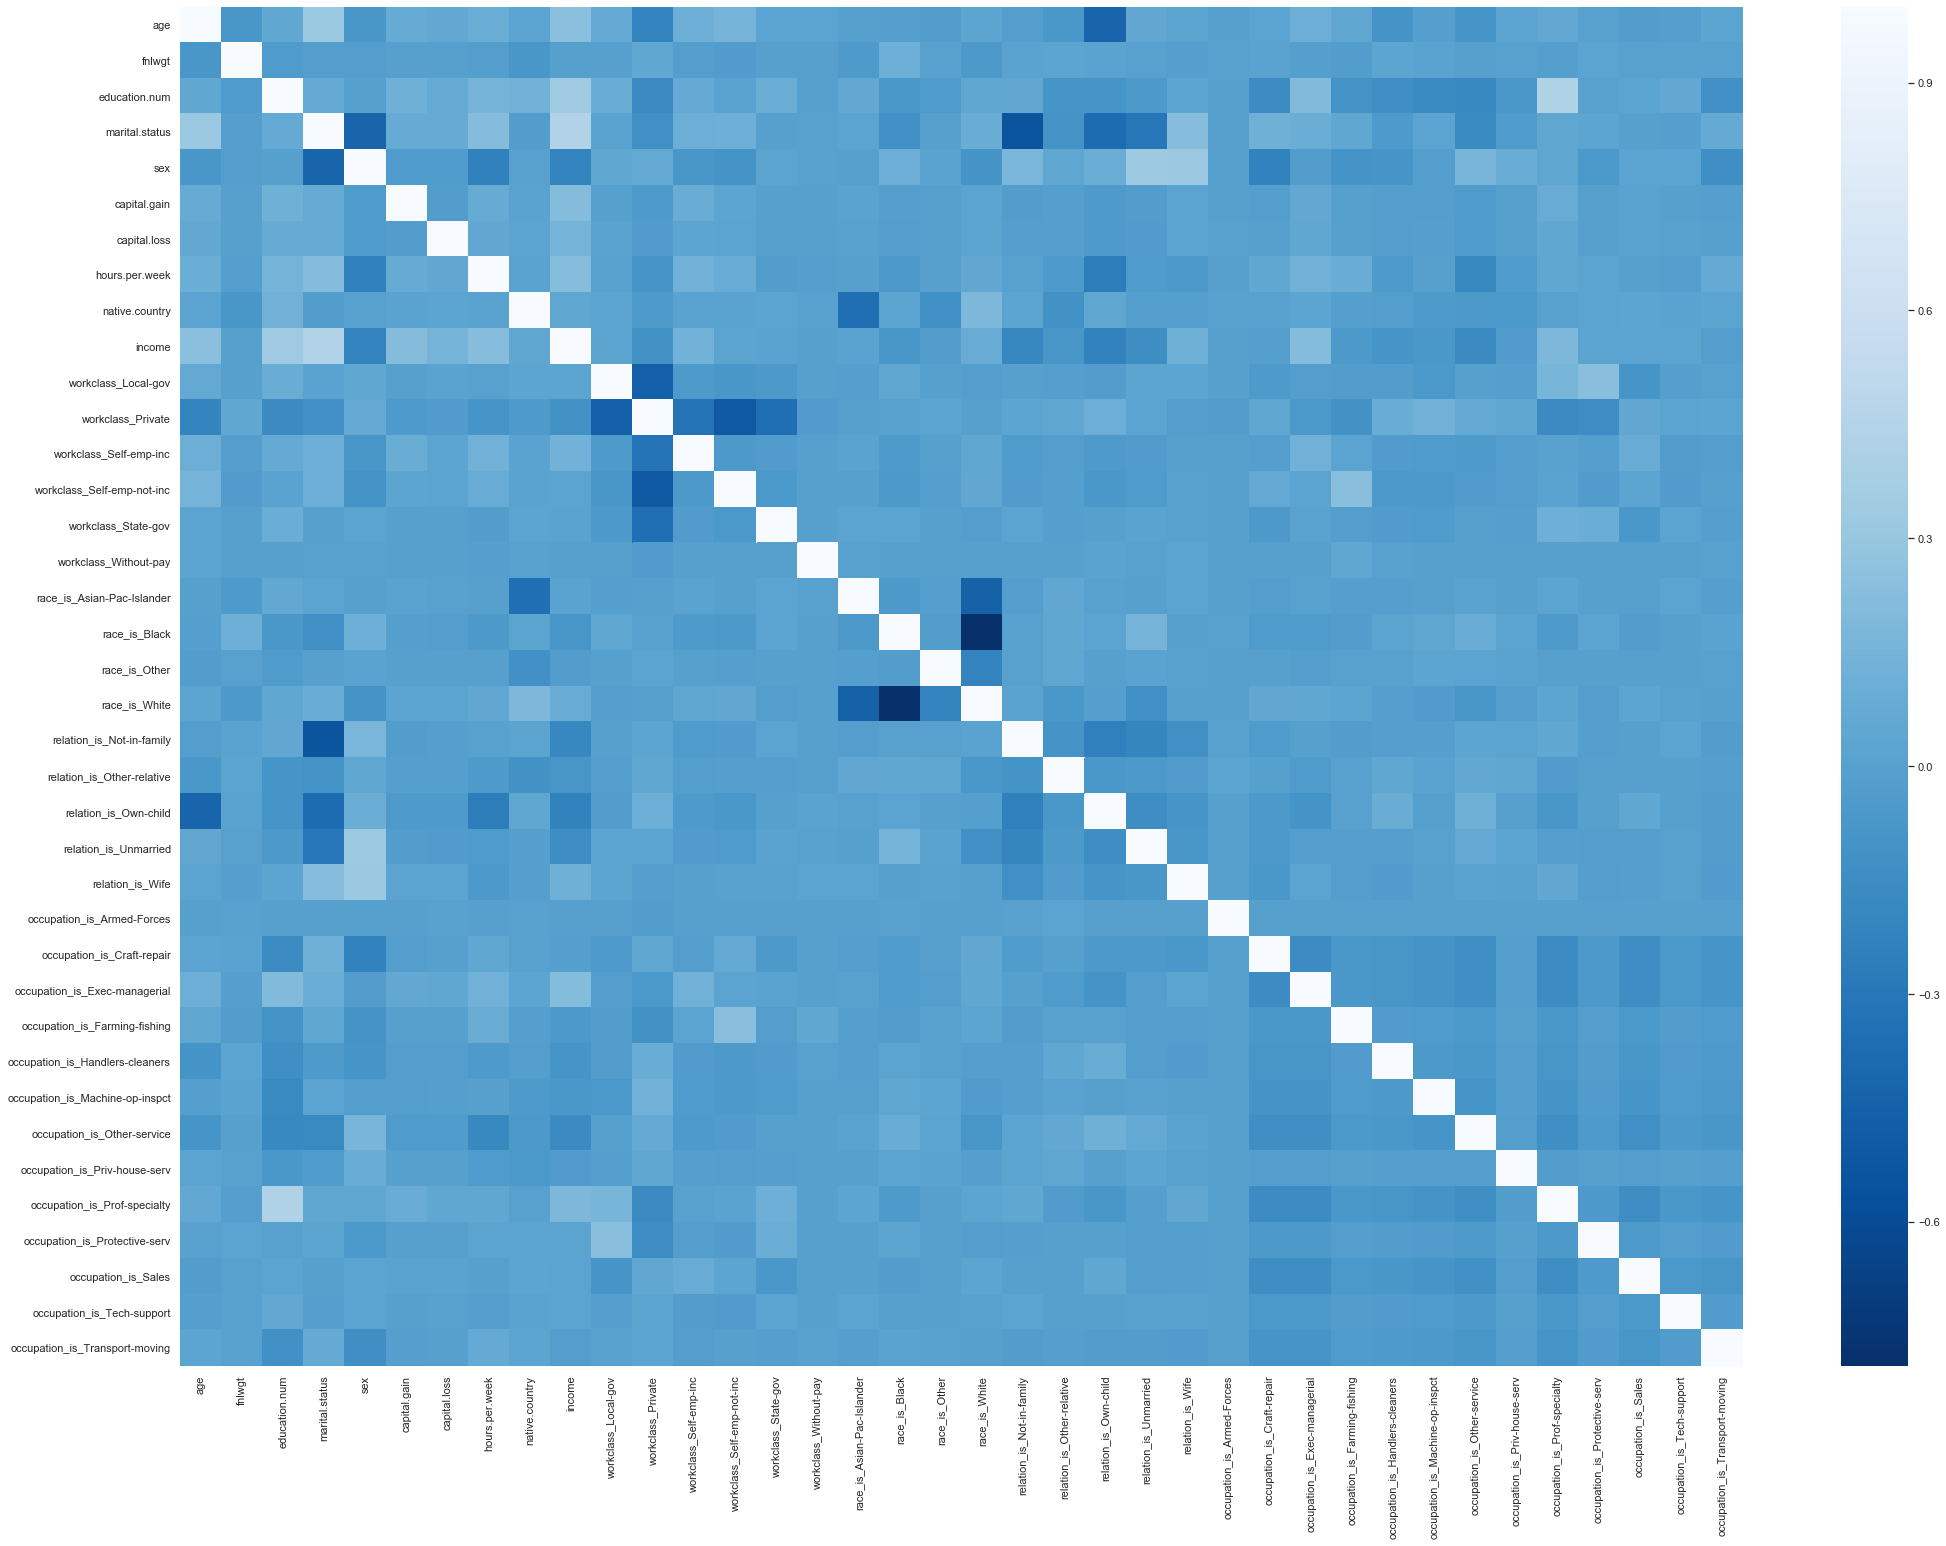

In [95]:
# Plot heat-map for showing correlation
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(),cmap="Blues_r")

In [96]:
# Drop insignificant variable

df = df.drop(columns=['fnlwgt','native.country'], axis=1)
df.columns

Index(['age', 'education.num', 'marital.status', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'income', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'race_is_Asian-Pac-Islander', 'race_is_Black',
       'race_is_Other', 'race_is_White', 'relation_is_Not-in-family',
       'relation_is_Other-relative', 'relation_is_Own-child',
       'relation_is_Unmarried', 'relation_is_Wife',
       'occupation_is_Armed-Forces', 'occupation_is_Craft-repair',
       'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing',
       'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct',
       'occupation_is_Other-service', 'occupation_is_Priv-house-serv',
       'occupation_is_Prof-specialty', 'occupation_is_Protective-serv',
       'occupation_is_Sales', 'occupation_is_Tech-support',
       'occupation_is_Transport-moving'],
      dtype='ob

In [97]:
df.info()
# We have 36 columns after performing data-preprocessing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 36 columns):
age                                30718 non-null int64
education.num                      30718 non-null int64
marital.status                     30718 non-null int64
sex                                30718 non-null int64
capital.gain                       30718 non-null int64
capital.loss                       30718 non-null int64
hours.per.week                     30718 non-null int64
income                             30718 non-null int64
workclass_Local-gov                30718 non-null uint8
workclass_Private                  30718 non-null uint8
workclass_Self-emp-inc             30718 non-null uint8
workclass_Self-emp-not-inc         30718 non-null uint8
workclass_State-gov                30718 non-null uint8
workclass_Without-pay              30718 non-null uint8
race_is_Asian-Pac-Islander         30718 non-null uint8
race_is_Black                      30718 non-null u

# Splitting dataset into train and test sets

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x1 = df[['age', 'education.num', 'marital.status', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'race_is_Asian-Pac-Islander', 'race_is_Black',
       'race_is_Other', 'race_is_White', 'relation_is_Not-in-family',
       'relation_is_Other-relative', 'relation_is_Own-child',
       'relation_is_Unmarried', 'relation_is_Wife',
       'occupation_is_Armed-Forces', 'occupation_is_Craft-repair',
       'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing',
       'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct',
       'occupation_is_Other-service', 'occupation_is_Priv-house-serv',
       'occupation_is_Prof-specialty', 'occupation_is_Protective-serv',
       'occupation_is_Sales', 'occupation_is_Tech-support',
       'occupation_is_Transport-moving']]

y1 = df['income']


x_train, x_test, y_train1, y_test1 = train_test_split(x1,y1, random_state = 1, test_size=0.25)


scaler1 = MinMaxScaler()
x_train1 = scaler1.fit_transform(x_train)
x_test1 = scaler1.transform(x_test)



# KNN Classifier

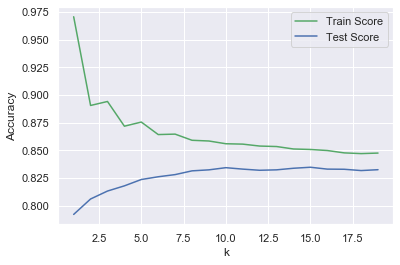

In [99]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array1 = []
test_score_array1 = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train1, y_train1)
    train_score_array1.append(knn.score(x_train1, y_train1))
    test_score_array1.append(knn.score(x_test1, y_test1))
    
x_axis = range(1,20)

%matplotlib inline
plt.plot(x_axis, train_score_array1, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array1, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [100]:
from sklearn import metrics
y1_Predict=knn.predict(x_test1)
print("Train Score:",knn.score(x_train1, y_train1))
print("Test Score:",knn.score(x_test1,y_test1))
print("\nReport:", metrics.classification_report(y_test1, y1_Predict))

Train Score: 0.8475562114766907
Test Score: 0.8325520833333333

Report:               precision    recall  f1-score   support

           0       0.87      0.91      0.89      5752
           1       0.69      0.60      0.64      1928

    accuracy                           0.83      7680
   macro avg       0.78      0.76      0.77      7680
weighted avg       0.83      0.83      0.83      7680



//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


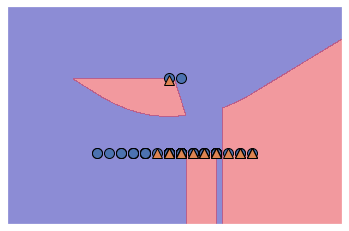

In [101]:
import mglearn
x_check = x_train1[100:250,[1,5]]
y_check = y_train1[100:250]

knn1 = KNeighborsClassifier(1)
knn1.fit(x_check, y_check) 

mglearn.plots.plot_2d_separator(knn1, x_check, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_check[:, 0], x_check[:, 1], y_check)

# KNN Classifier using GridSearch

In [102]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 10)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn2, param_grid, cv = 3)

#fit model to data
knn_gs.fit(x_train1, y_train1)
y1_Predict2 = knn_gs.predict(x_test1)

#check top performing n_neighbors value
print(knn_gs.best_params_)
print("Best Score :", knn_gs.best_score_)
print("\nReport:", metrics.classification_report(y_test1, y1_Predict2))

{'n_neighbors': 8}
Best Score : 0.8277628266342565

Report:               precision    recall  f1-score   support

           0       0.86      0.93      0.89      5752
           1       0.72      0.54      0.62      1928

    accuracy                           0.83      7680
   macro avg       0.79      0.73      0.75      7680
weighted avg       0.82      0.83      0.82      7680



In [103]:
#Confusion Matrix
pd.crosstab(y_test1, y1_Predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,5238,514,5752
1,772,1156,1928
All,6010,1670,7680


# KNN Classifier using K-fold Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cross = KNeighborsClassifier(n_neighbors=8)

#train model with cv of 5 
cross_scores = cross_val_score(knn_cross, x_train1, y_train1)

#print each cv score (accuracy) and average them
print(cross_scores)
print("cv_scores mean:{}".format(np.mean(cross_scores)))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.82539063 0.83187915 0.82601901]
cv_scores mean:0.8277629296078048


# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_lr1 = []
train_score_lr2 = []
test_score_lr1 = []
test_score_lr2 = []

for c in c_range:
    log_lr1 = LogisticRegression(penalty = 'l1', C = c)
    log_lr2 = LogisticRegression(penalty = 'l2', C = c)
    log_lr1.fit(x_train1, y_train1)
    log_lr2.fit(x_train1, y_train1)
    train_score_lr1.append(log_lr1.score(x_train1, y_train1))
    train_score_lr2.append(log_lr2.score(x_train1, y_train1))
    test_score_lr1.append(log_lr1.score(x_test1, y_test1))
    test_score_lr2.append(log_lr2.score(x_test1, y_test1))
    

y_Predict2=log_lr1.predict(x_test1)
y_Predict3=log_lr2.predict(x_test1)
print("Test Score for L1:",log_lr1.score(x_test1, y_test1))
print("Test Score for L2:",log_lr2.score(x_test1, y_test1))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Test Score for L1: 0.8479166666666667
Test Score for L2: 0.8477864583333333


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


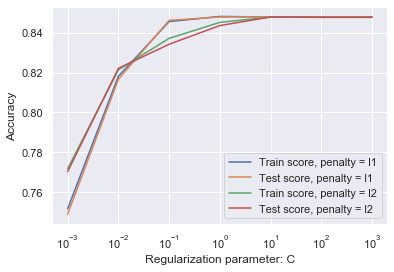

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_lr1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_lr1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_lr2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_lr2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

# Logistic Regression using GridSearch

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[1000]}# l1 lasso l2 ridge
logreg_gs=LogisticRegression()
logreg_cv=GridSearchCV(logreg_gs,grid,cv=5)
logreg_cv.fit(x_train1,y_train1)

print("tuned hpyerparameters :(best parameters)",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

tuned hpyerparameters :(best parameters) {'C': 1.0, 'max_iter': 1000, 'penalty': 'l1'}
accuracy : 0.8466012674711346


In [108]:
logreg_gs2=LogisticRegression(C=100,penalty="l1", max_iter= 1000)
logreg_gs2.fit(x_train1,y_train1)
y_predict_gs = logreg_gs2.predict(x_test1)
print("Train score",logreg_gs2.score(x_train1,y_train1))

print("Test score",logreg_gs2.score(x_test1,y_test1))

print("\nReport:", metrics.classification_report(y_test1, y_predict_gs))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score 0.8478600572966404
Test score 0.8479166666666667

Report:               precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.73      0.62      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



# Logistic Regression using recursive feature elimination & cross-validated selection

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Optimal number of features: 32
Selected features: ['age', 'education.num', 'marital.status', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'race_is_Asian-Pac-Islander', 'race_is_Other', 'relation_is_Not-in-family', 'relation_is_Other-relative', 'relation_is_Own-child', 'relation_is_Unmarried', 'relation_is_Wife', 'occupation_is_Armed-Forces', 'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing', 'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct', 'occupation_is_Other-service', 'occupation_is_Priv-house-serv', 'occupation_is_Prof-specialty', 'occupation_is_Protective-serv', 'occupation_is_Sales', 'occupation_is_Tech-support', 'occupation_is_Transport-moving']


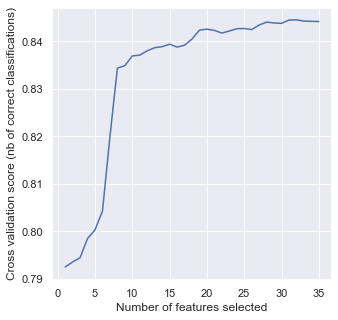

In [109]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
lr_rfcv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
lr_rfcv.fit(x_train1, y_train1)
y_pred_rfcv = lr_rfcv.predict(x_test1)
print("Optimal number of features: %d" % lr_rfcv.n_features_)
print('Selected features: %s' % list(x_train.columns[lr_rfcv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(lr_rfcv.grid_scores_) + 1), lr_rfcv.grid_scores_)
plt.show()

In [110]:
print("Test score for rfecv",lr_rfcv.score(x_test1,y_test1))
print("\nReport:", metrics.classification_report(y_test1, y_pred_rfcv))

Test score for rfecv 0.84375

Report:               precision    recall  f1-score   support

           0       0.87      0.92      0.90      5752
           1       0.73      0.61      0.66      1928

    accuracy                           0.84      7680
   macro avg       0.80      0.76      0.78      7680
weighted avg       0.84      0.84      0.84      7680



# Linear Support Vector Machine

In [111]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc = svm.LinearSVC(C=2.0, random_state=0)
svc.fit(x_train1,y_train1)
print('Train accuracy = {0}%'.format(np.round(svc.score(x_train1, y_train1) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(x_test1, y_test1) * 100, 2)))
predictions = svc.predict(x_test1)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, predictions))

accuracy_train = np.round(svc.score(x_train1, y_train1) * 100, 2)
accuracy_test = np.round(svc.score(x_test1, y_test1) * 100, 2)

Train accuracy = 84.76%
Test accuracy = 84.86%

 Confusion Matrix: 

[[5336  416]
 [ 747 1181]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.74      0.61      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



# Kernelized Support Vector Machine

In [112]:
# rbf
ksvm1 = svm.SVC(kernel="rbf", random_state= 0)
ksvm1.fit(x_train1, y_train1)
print('Train accuracy = {0}%'.format(np.round(ksvm1.score(x_train1, y_train1) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(ksvm1.score(x_test1, y_test1) * 100, 2)))
predictions = svc.predict(x_test1)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Report: \n")
print(classification_report(y_test1.values, predictions))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train accuracy = 83.43%
Test accuracy = 83.01%

 Confusion Matrix: 

[[5336  416]
 [ 747 1181]]

 Report: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.74      0.61      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [113]:
# poly
ksvm2 = svm.SVC(kernel="poly", random_state= 0, gamma="scale")
ksvm2.fit(x_train1, y_train1)
print('Train accuracy = {0}%'.format(np.round(ksvm2.score(x_train1, y_train1) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(ksvm2.score(x_test1, y_test1) * 100, 2)))
predictions = svc.predict(x_test1)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Report: \n")
print(classification_report(y_test1.values, predictions))

Train accuracy = 84.69%
Test accuracy = 83.82%

 Confusion Matrix: 

[[5336  416]
 [ 747 1181]]

 Report: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.74      0.61      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [114]:
# linear
kvsm3 = svm.SVC(kernel="linear", random_state= 0)
kvsm3.fit(x_train1, y_train1)
print('Train accuracy = {0}%'.format(np.round(kvsm3.score(x_train1, y_train1) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(kvsm3.score(x_test1, y_test1) * 100, 2)))
predictions = svc.predict(x_test1)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Report: \n")
print(classification_report(y_test1.values, predictions))

Train accuracy = 84.64%
Test accuracy = 84.61%

 Confusion Matrix: 

[[5336  416]
 [ 747 1181]]

 Report: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.74      0.61      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



# Decision Tree

In [115]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_clf.fit(x_train1, y_train1)
y_predict_tree = tree_clf.predict(x_test1)

print("Accuracy on training set: {:.3f}".format(tree_clf.score(x_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(tree_clf.score(x_test1, y_test1)))
print("\nReport:", metrics.classification_report(y_test1, y_predict_tree))

Accuracy on training set: 0.839
Accuracy on test set: 0.839

Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90      5752
           1       0.76      0.53      0.62      1928

    accuracy                           0.84      7680
   macro avg       0.81      0.73      0.76      7680
weighted avg       0.83      0.84      0.83      7680



# Decision Tree png file

In [116]:
def printTree(clf_tree):
    from sklearn import tree
    tree.export_graphviz(clf_tree,out_file='tree.dot') 
    from sklearn.externals.six import StringIO  
    import pydot 
    dot_data = StringIO() 
    tree.export_graphviz(clf_tree, out_file=dot_data) 
    
    (graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
    a=graph.write_png("decision_tree_diagram.png") 
    from IPython.display import Image
    import os
    return Image(filename=os.getcwd()+'~/Downloads/decision_tree_diagram.png')

# Decision Tree using GridSearch & Cross-Validation

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

sample_split_range = list(range(1, 10))
parameter_grid = {"criterion":['gini','entropy'],
                  'max_depth': range(1,20,2),
                  'max_features': range(1,17),
                  'min_samples_split':range(10,500,20)}

grid_search = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,cv = 5)
grid_search.fit(x_train1,y_train1)

print("Best Score:",format(grid_search.best_score_))
print("Best params:",format(grid_search.best_params_))

Best Score: 0.8510721416789652
Best params: {'criterion': 'entropy', 'max_depth': 19, 'max_features': 16, 'min_samples_split': 170}


In [118]:
tree_clf2 = DecisionTreeClassifier(criterion='gini',max_depth = 15, max_features = 17, min_samples_split = 10)
tree_clf2.fit(x_train1,y_train1)
y_pred_dtree=tree_clf2.predict(x_test1)
print("Test score",tree_clf2.score(x_test1,y_test1))
print("\nReport:", metrics.classification_report(y_test1, y_pred_dtree))

Test score 0.8481770833333333

Report:               precision    recall  f1-score   support

           0       0.87      0.93      0.90      5752
           1       0.75      0.60      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.78      7680
weighted avg       0.84      0.85      0.84      7680



# Best Model selection

Decision tree is best model for predicting income as the difference between train and test score is minimum(basically 0 in this case), and recall value is also highest i.e. 0.94


# Screenshots for Classification and Regression metrics

<img src="best_model_classification.png">

<img src="best_model.png">